**Outline:**

1. [Libraries and settings](#1-bullet)
2. [Analyze data](#2-bullet)
3. [Manipulate data](#3-bullet)
4. [Model and validate data](#4-bullet)
5. [Predictions](#5-bullet)
6. [Deployment](#6-bullet)

# 1. Libraries and settings <a class="anchor" id="1-bullet"></a> 

In [1]:
import numpy as np
import pandas as pd

import torch
import torch.nn as nn
import math
import datetime
import os
import matplotlib.pyplot as plt

# 2. Analyze data <a class="anchor" id="2-bullet"></a> 
- parse raw data and generate csv file
- load data
- analyze data

**parse raw data and generate csv file**

In [2]:
# from utils import buildDataset

In [3]:
# # parse raw data and create csv file
# strategy = "./defaultStrategy.txt"
# output = "./defaultOutputs.txt"
# csvfile = "./defaultStrategy.csv"
# default = True   # whether this is default strategy or generated strategies
# createCSV = True # whether to write parsed data to csv. 
#                  # Set to True only if this is the 1st time parsing
# df = buildDataset.parseRawData(strategy, output, csvfile, 
#                                default=default, createCSV=createCSV)

In [5]:
csvfile = "../data/dataset/defaultStrategy.csv"
df = pd.read_csv(csvfile)

In [6]:
# show data info
df.info()

# number of different designs
numDesign = df.loc[len(df) - 1, 'design'] + 1
print('\nnumber of different designs: ', numDesign)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2795 entries, 0 to 2794
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   design          2795 non-null   int64  
 1   size            2795 non-null   float64
 2   offset          2795 non-null   float64
 3   mazeEndIter     2795 non-null   float64
 4   DRCCost         2795 non-null   float64
 5   MarkerCost      2795 non-null   float64
 6   FixedShapeCost  2795 non-null   float64
 7   Decay           2795 non-null   float64
 8   ripupMode       2795 non-null   object 
 9   followGuide     2795 non-null   bool   
 10  DRC             2795 non-null   int64  
dtypes: bool(1), float64(7), int64(2), object(1)
memory usage: 221.2+ KB

number of different designs:  43


In [7]:
df.head(10)

design  size  offset  mazeEndIter  DRCCost  MarkerCost  FixedShapeCost  \
0       0   7.0     0.0          3.0      8.0         0.0             8.0   
1       0   7.0    -2.0          3.0      8.0         8.0             8.0   
2       0   7.0    -5.0          3.0      8.0         8.0             8.0   
3       0   7.0     0.0          8.0      8.0        32.0            16.0   
4       0   7.0    -1.0          8.0      8.0        32.0            16.0   
5       0   7.0    -2.0          8.0      8.0        32.0            16.0   
6       0   7.0    -3.0          8.0      8.0        32.0            16.0   
7       0   7.0    -4.0          8.0      8.0        32.0            16.0   
8       0   7.0    -5.0          8.0      8.0        32.0            16.0   
9       0   7.0    -6.0          8.0      8.0        32.0            16.0   

   Decay ripupMode  followGuide    DRC  
0   0.95       ALL         True  10178  
1   0.95       ALL         True    569  
2   0.95       ALL         True    499  
3   0.95       DRC        False      1  
4   0.95       DRC        False      0  
5   0.95       DRC        False      0  
6   0.95       DRC        False      0  
7   0.95       DRC        False      0  
8   0.95       DRC        False      0  
9   0.95       DRC        False      0

In [8]:
df.tail()

design  size  offset  mazeEndIter  DRCCost  MarkerCost  FixedShapeCost  \
2790      42   7.0    -2.0         64.0    512.0       512.0           800.0   
2791      42   7.0    -3.0         64.0    512.0       512.0           800.0   
2792      42   7.0    -4.0         64.0    512.0       512.0           800.0   
2793      42   7.0    -5.0         64.0    512.0       512.0           800.0   
2794      42   7.0    -6.0         64.0    512.0       512.0           800.0   

      Decay ripupMode  followGuide  DRC  
2790  0.999       DRC        False    0  
2791  0.999       DRC        False    0  
2792  0.999       DRC        False    0  
2793  0.999       DRC        False    0  
2794  0.999       DRC        False    0

In [9]:
df.describe()

design         size       offset  mazeEndIter      DRCCost  \
count  2795.000000  2795.000000  2795.000000  2795.000000  2795.000000   
mean     21.000000     6.723077    -2.830769    17.246154   107.815385   
std      12.411894     0.984792     1.981568    17.956169   148.921949   
min       0.000000     3.000000    -6.000000     3.000000     8.000000   
25%      10.000000     7.000000    -5.000000     8.000000     8.000000   
50%      21.000000     7.000000    -3.000000     8.000000    32.000000   
75%      32.000000     7.000000    -1.000000    16.000000   128.000000   
max      42.000000     7.000000     0.000000    64.000000   512.000000   

        MarkerCost  FixedShapeCost        Decay            DRC  
count  2795.000000     2795.000000  2795.000000    2795.000000  
mean    116.430769      387.938462     0.967462    1067.929517  
std     143.553323      348.503444     0.022260    9077.283491  
min       0.000000        8.000000     0.950000       0.000000  
25%      32.000000       32.000000     0.950000       0.000000  
50%      32.000000      400.000000     0.950000       0.000000  
75%     128.000000      800.000000     0.990000       0.000000  
max     512.000000      800.000000     0.999000  177521.000000

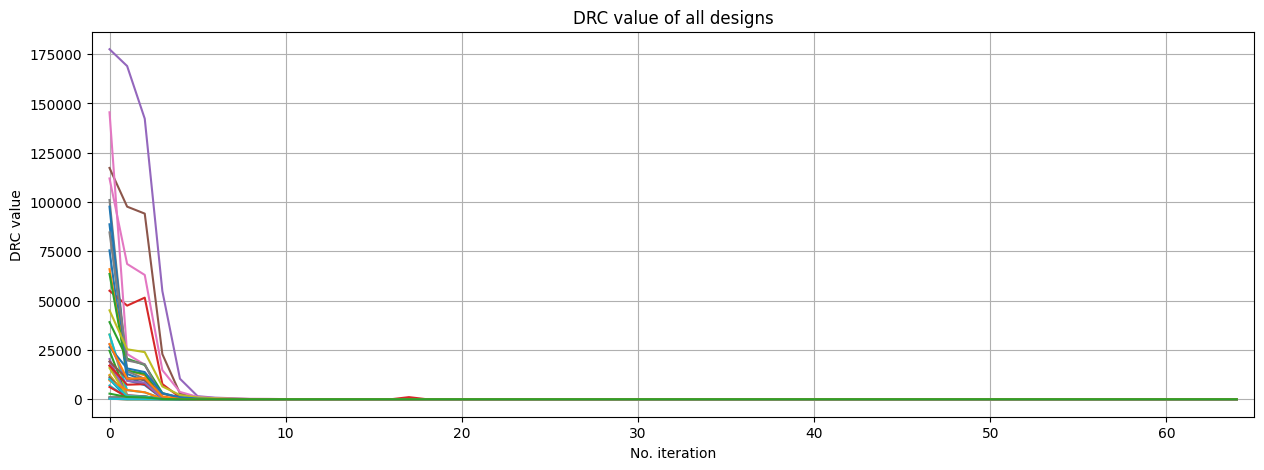

In [10]:
plt.figure(figsize=(15, 5));

for i in range(numDesign):
    plt.plot(df[df.design == i].DRC.values)
plt.title('DRC value of all designs')
plt.xlabel('No. iteration')
plt.ylabel('DRC value')
plt.xlim([-1, 65])
plt.grid()
plt.show()

In [11]:
designSize = len(df[df['design'] == 0])
numDesign = int(len(df)/designSize)
print(f"There are {numDesign} designs in total, each contains {designSize} DRC sequences")

There are 43 designs in total, each contains 65 DRC sequences


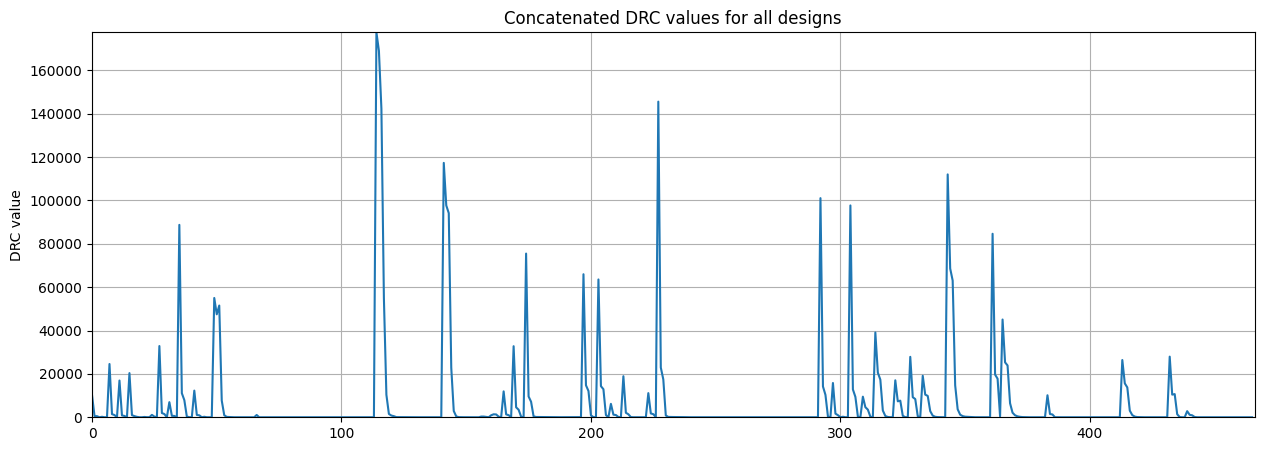

In [12]:
drcValues = np.delete(df['DRC'].to_numpy(), np.where(df['DRC'].to_numpy() == 0))
plt.figure(figsize=(15, 5));
plt.plot(drcValues)

plt.title(f'Concatenated DRC values for all designs')
plt.ylabel('DRC value')
plt.xlim([0, len(drcValues)])
plt.ylim([0, max(drcValues)])
plt.grid()
plt.show()

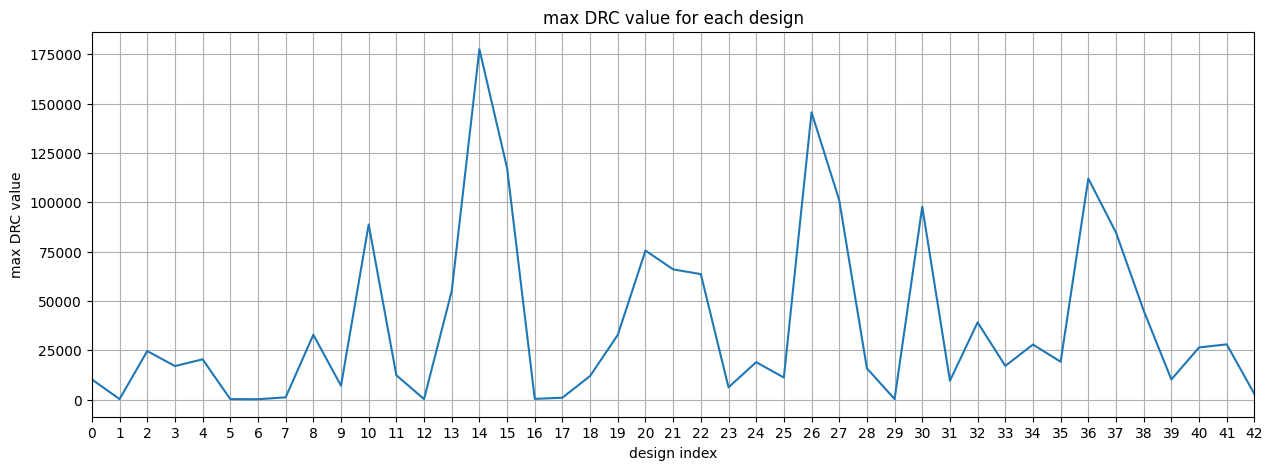

In [13]:
plt.figure(figsize=(15, 5));
plt.plot(df.DRC.values[::designSize])

plt.title(f'max DRC value for each design')
plt.xlabel('design index')
plt.xticks(np.arange(numDesign))
plt.ylabel('max DRC value')
plt.xlim([0, numDesign - 1])
plt.grid()
plt.show()

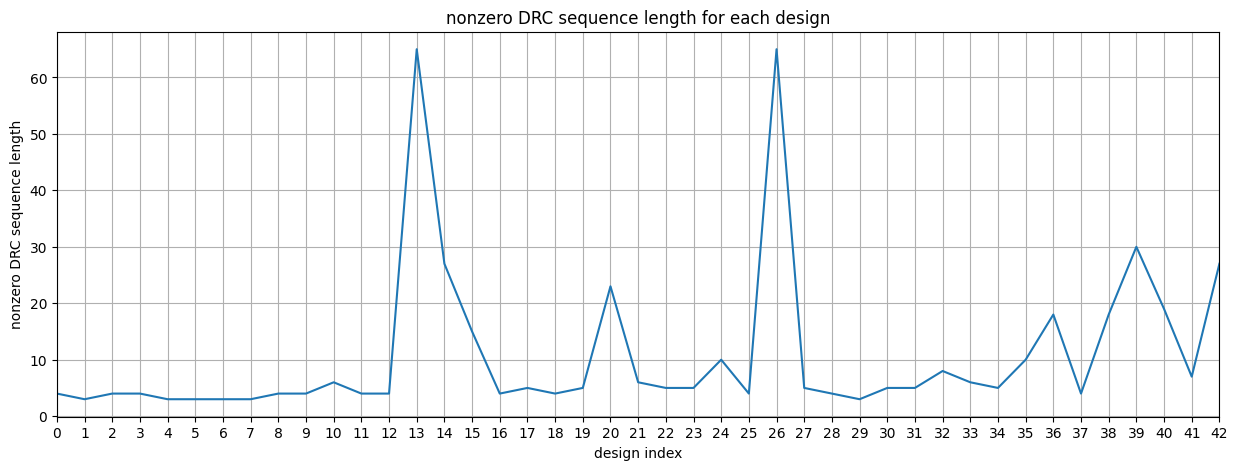

In [14]:
plt.figure(figsize=(15, 5));
# get DRC sequence length for each design
length = [sum(df[df['design'] == i].DRC.values != 0) for i in range(numDesign)]
plt.plot(length)

plt.title(f'nonzero DRC sequence length for each design')
plt.xlabel('design index')
plt.xticks(np.arange(numDesign))
plt.ylabel('nonzero DRC sequence length')
plt.xlim([0, numDesign - 1])
plt.grid()
plt.show()

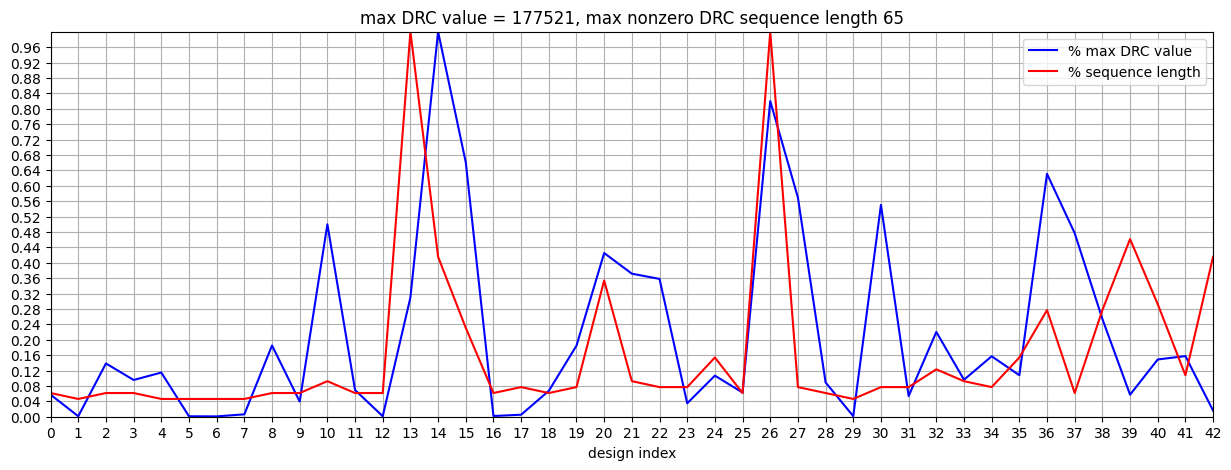

In [15]:
plt.figure(figsize=(15, 5));
maxDRC = max(df.DRC.values[::designSize])
plt.plot(df.DRC.values[::designSize] / maxDRC, 
         '-b', label='% max DRC value')

maxLen = max(length)
plt.plot(length / maxLen, '-r', label='% sequence length')

plt.title(f'max DRC value = {maxDRC}, max nonzero DRC sequence length {maxLen}')
plt.xlabel('design index')
plt.xticks(np.arange(numDesign))
plt.yticks(np.arange(25)/25)
plt.xlim([0, numDesign - 1])
plt.ylim([0, 1])
plt.grid()
plt.legend()
plt.show()

### Correlation analysis: which item contributes to minimum number of iterations?

In [2]:
# read summary data
summaryPath = "../data/dataset"
summaryFilename = "workerDataSummary.csv"
df = pd.read_csv(os.path.join(summaryPath, summaryFilename), index_col=False)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   designIndex  480 non-null    int64
 1   iter         480 non-null    int64
 2   curr_drc     480 non-null    int64
 3   prev_drc     480 non-null    int64
 4   delta_drc    480 non-null    int64
dtypes: int64(5)
memory usage: 18.9 KB


In [4]:
df.describe()

designIndex        iter       curr_drc       prev_drc      delta_drc
count   480.000000  480.000000     480.000000     480.000000     480.000000
mean     13.172917   12.150000    5397.041667    5245.739583    -151.302083
std      10.620090   13.366615   19954.525240   21312.172227   18269.421559
min       0.000000    0.000000       1.000000       0.000000 -221311.000000
25%       2.000000    3.000000       7.000000       3.000000    -199.000000
50%      12.000000    7.000000      85.000000      86.000000      -0.500000
75%      20.000000   18.000000    1710.250000    1814.750000      22.000000
max      38.000000   64.000000  307386.000000  351868.000000  231508.000000

In [16]:
# length

In [17]:
data = dict()

In [18]:
for i in range(20):
    col = "iter " + str(i)
    data[col] = list(df.DRC.values[i::designSize])
data['length'] = length

In [19]:
# create a dataframe to analyze the relationship between DRC value and number of iterations
dfDRC = pd.DataFrame(data, index=None)

In [20]:
corr = dfDRC.corr(method="pearson")

In [21]:
import seaborn as sns

#### The final target is to minimize the number of iterations. However, for each iteration, we can only get the DRC value. The relationship between DRC value and number of iterations is not a simple linear relationship. Therefore, we need to use deep learning model to predict the number of iterations to get a more accurate value

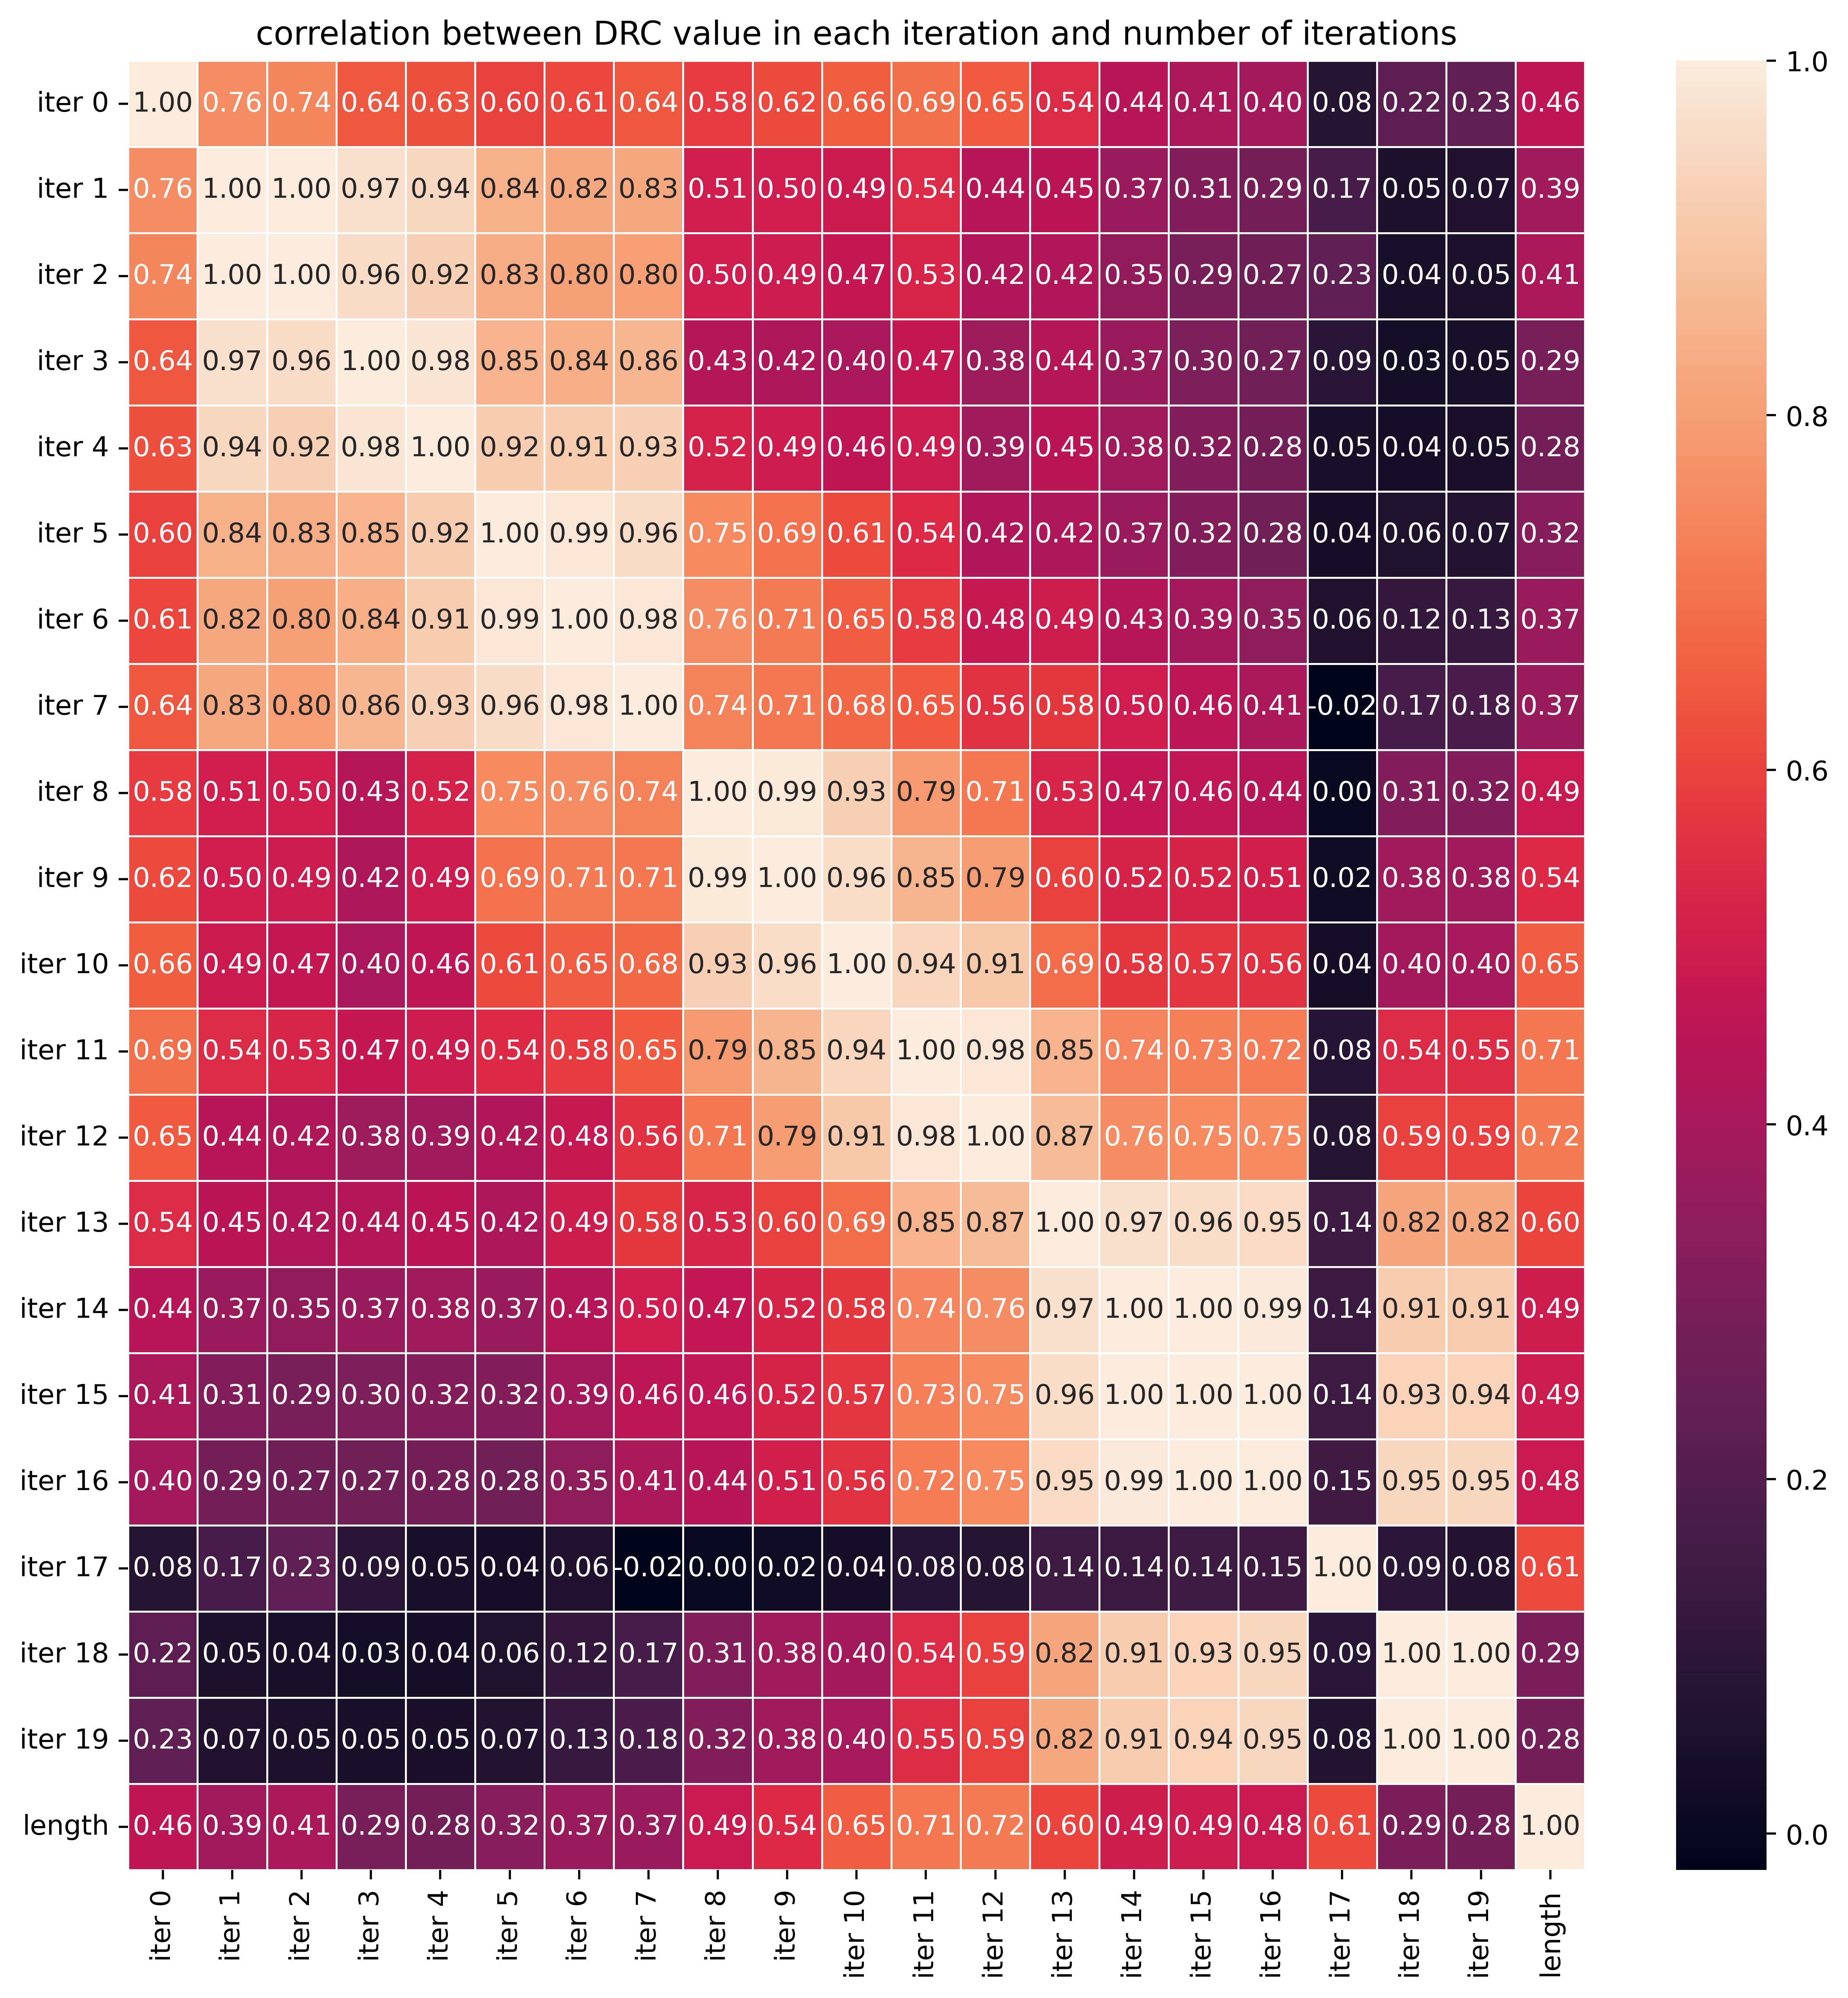

In [22]:
plt.figure(figsize=(12, 12), dpi=500)
sns.heatmap(corr, annot=True, fmt=".2f", linewidth=.5)
plt.title("correlation between DRC value in each iteration and number of iterations")
plt.show()

In [23]:
# linear regression for correlation analysis
from scipy import optimize

In [24]:
def linearFunc(x, a, b):
    y = a*x + b
    return y

In [25]:
alpha = optimize.curve_fit(linearFunc, xdata=data['iter 0'], ydata=data['length'])[0]
print(alpha)

[1.48739710e-04 5.18571251e+00]


[1.48739710e-04 5.18571251e+00]


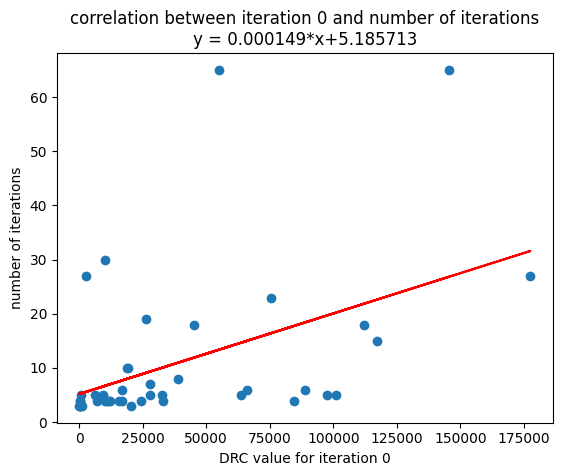

[1.78821967e-04 8.21344196e+00]


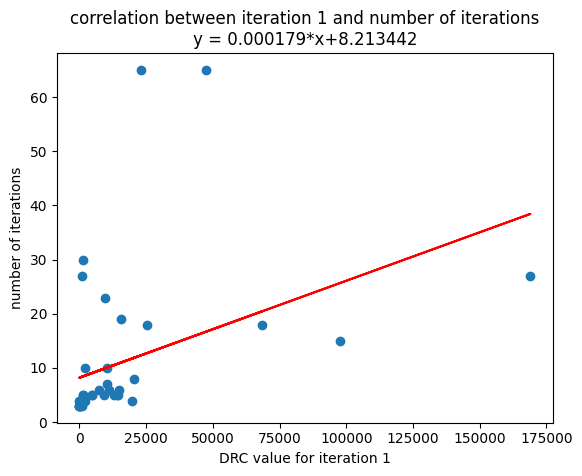

[2.11232243e-04 8.08638588e+00]


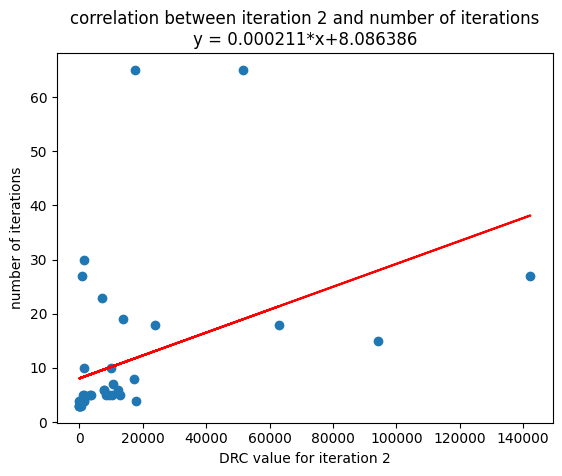

[4.48242532e-04 9.54228874e+00]


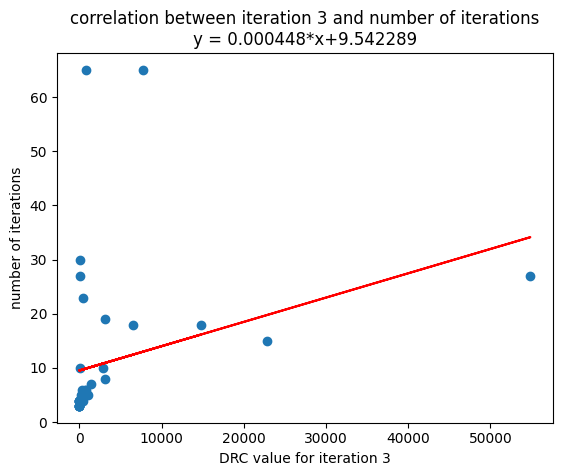

[2.30563567e-03 9.59323843e+00]


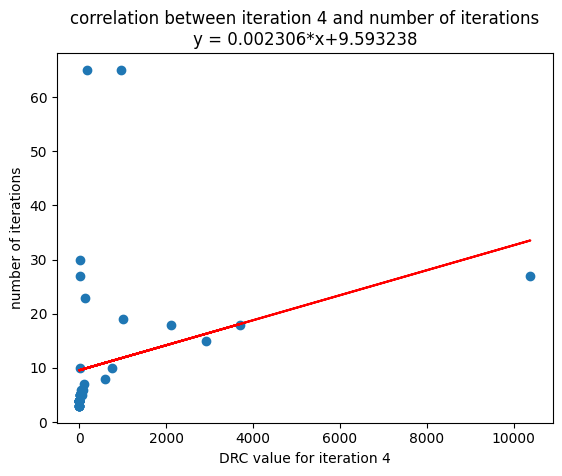

[0.01414533 9.12463733]


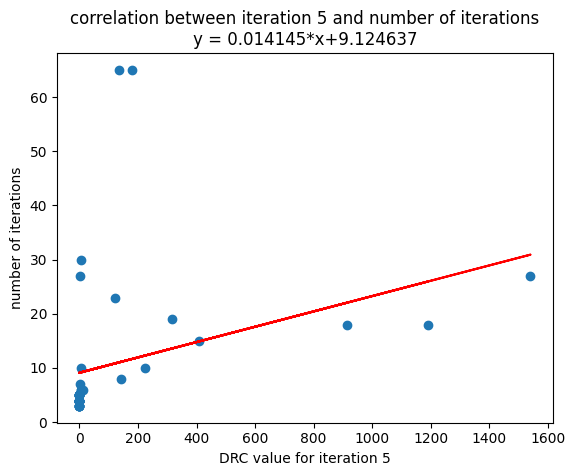

[0.03336147 9.00543169]


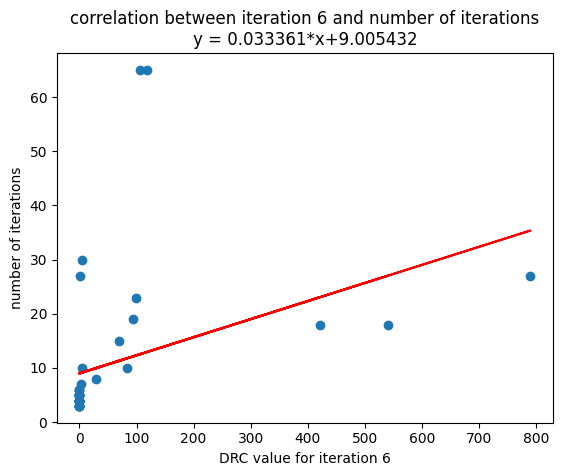

[0.05636429 9.07943001]


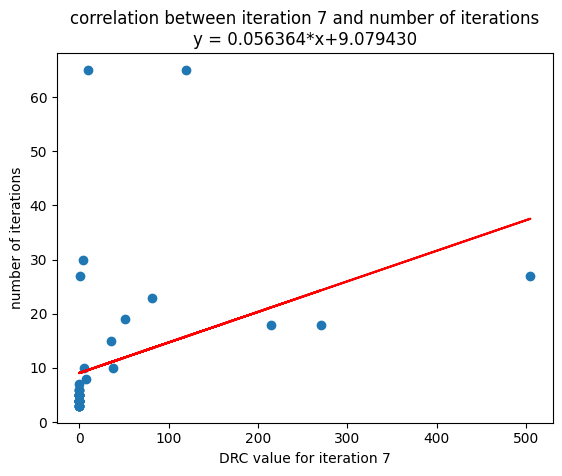

[0.17357109 8.26189876]


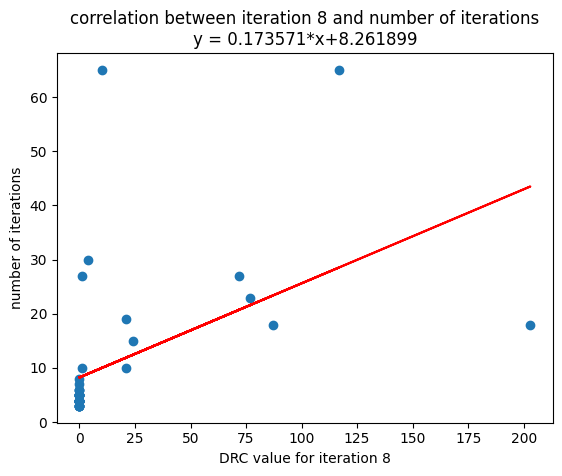

[0.23511204 7.96665538]


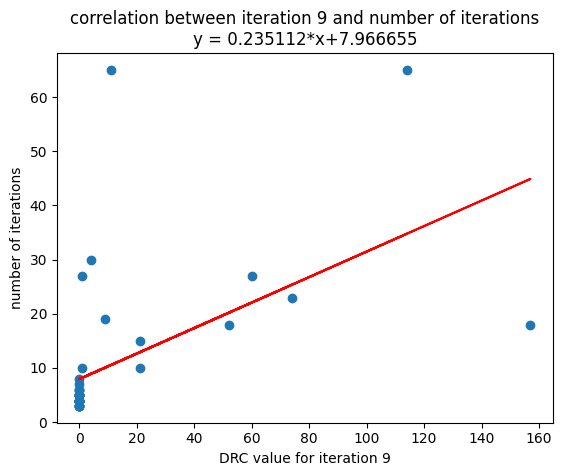

[0.59171391 7.42453373]


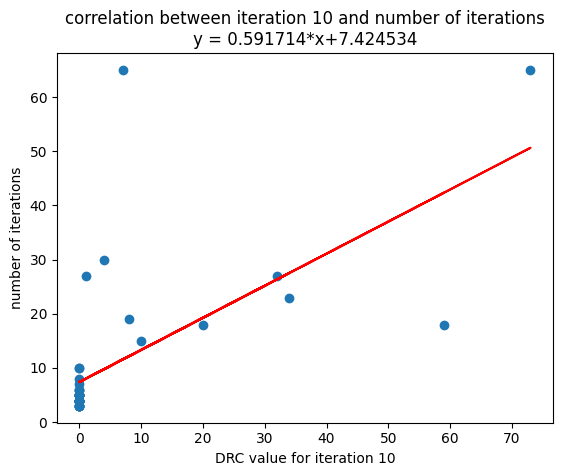

[1.17215736 6.93910459]


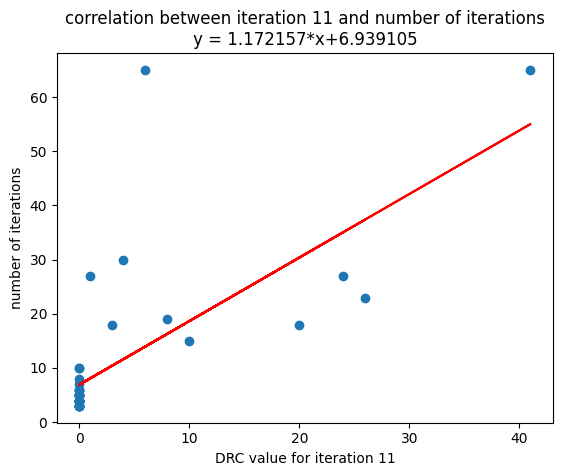

[1.28306972 7.19687196]


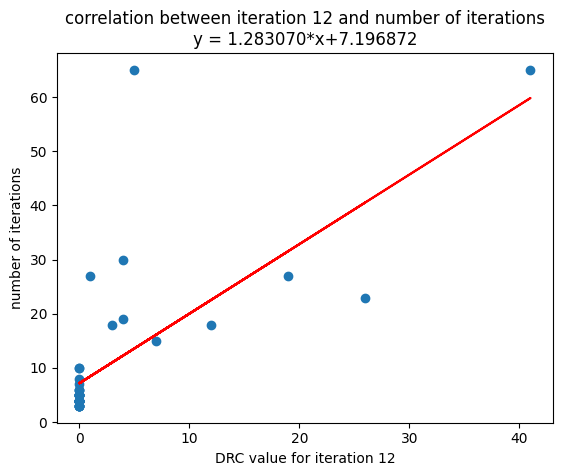

[1.61278432 7.87418696]


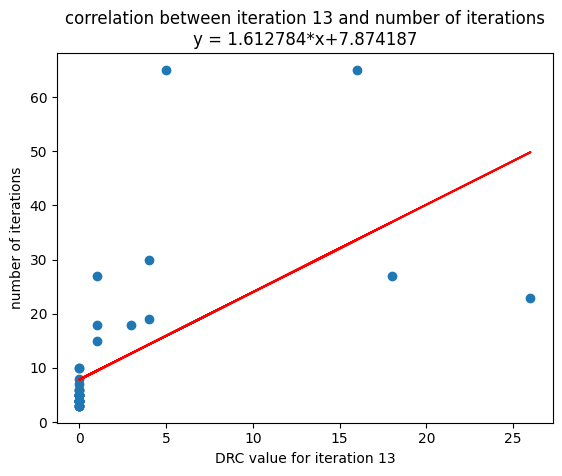

[1.53269056 8.52035148]


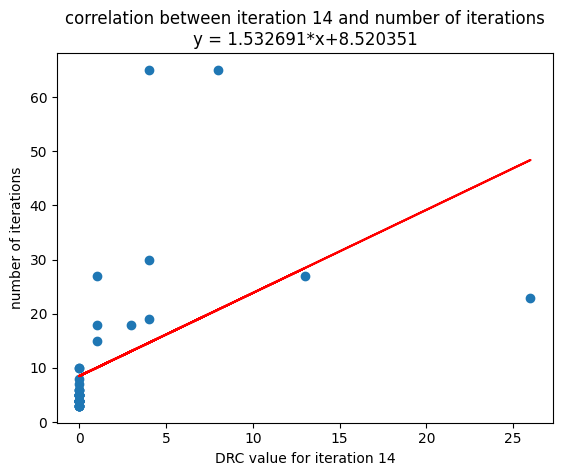

[1.56078001 8.62307952]


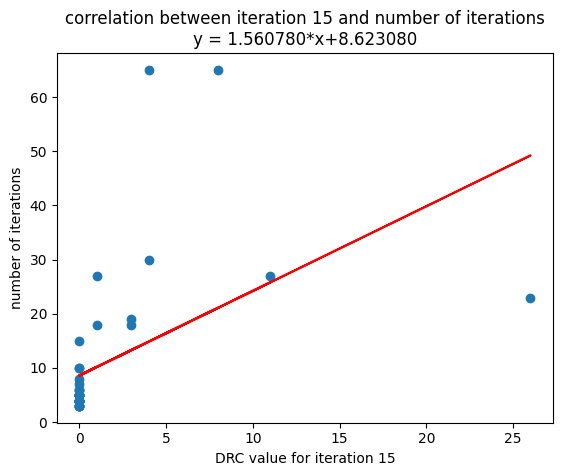

[1.56303394 8.72893091]


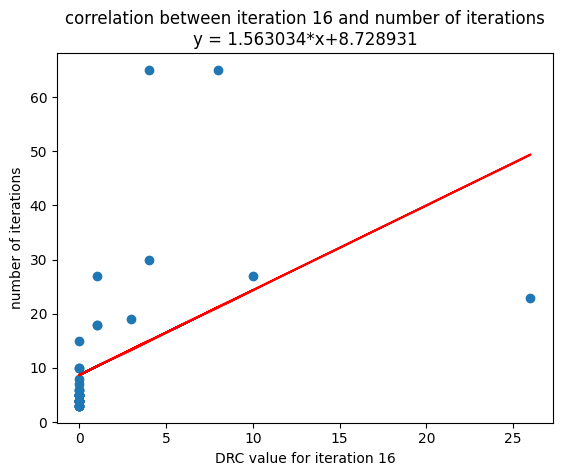

[0.05374705 9.40228807]


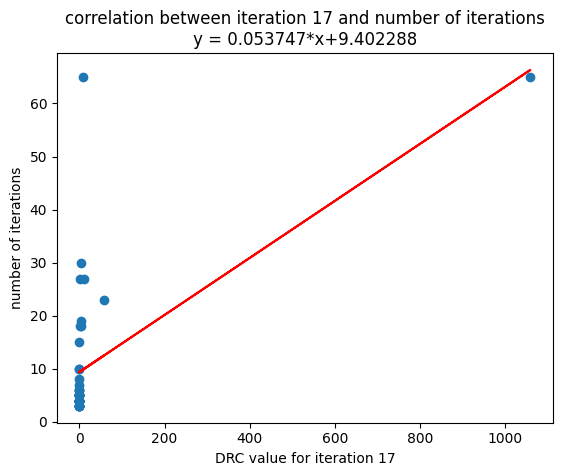

[0.47578736 9.94095869]


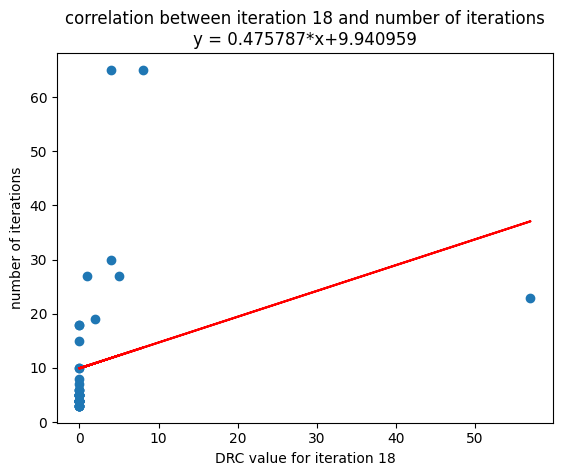

[0.45787132 9.99600386]


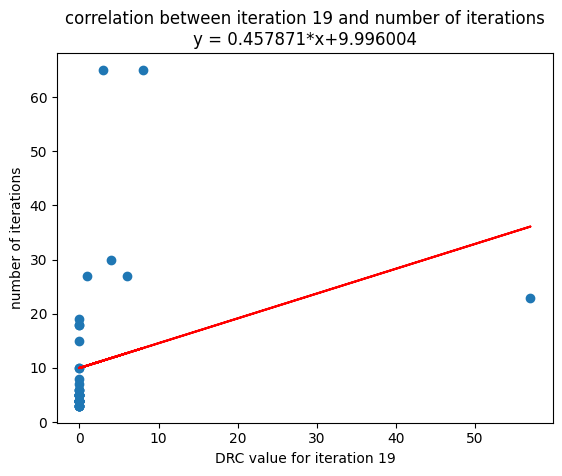

In [26]:
for iter in range(20):
    alpha = optimize.curve_fit(linearFunc, xdata=data['iter ' + str(iter)], ydata=data['length'])[0]
    print(alpha)
    plt.scatter(data['iter ' + str(iter)], data['length'])
    plt.plot(data['iter ' + str(iter)], alpha[0] * np.array(data['iter ' + str(iter)]) + alpha[1], 'r')
    plt.title('correlation between iteration {0} and number of iterations\ny = {1:.6f}*x+{2:.6f}'.format(iter, alpha[0], alpha[1]))
    plt.xlabel(f'DRC value for iteration {iter}')
    plt.ylabel('number of iterations')
    plt.show()

### add length data to dataset

In [27]:
lenData = np.array([])
for value in length:
    lenData = np.hstack((lenData, value * np.ones(designSize, dtype=int)))

In [28]:
df['length'] = lenData

In [29]:
df

design  size  offset  mazeEndIter  DRCCost  MarkerCost  FixedShapeCost  \
0          0   7.0     0.0          3.0      8.0         0.0             8.0   
1          0   7.0    -2.0          3.0      8.0         8.0             8.0   
2          0   7.0    -5.0          3.0      8.0         8.0             8.0   
3          0   7.0     0.0          8.0      8.0        32.0            16.0   
4          0   7.0    -1.0          8.0      8.0        32.0            16.0   
...      ...   ...     ...          ...      ...         ...             ...   
2790      42   7.0    -2.0         64.0    512.0       512.0           800.0   
2791      42   7.0    -3.0         64.0    512.0       512.0           800.0   
2792      42   7.0    -4.0         64.0    512.0       512.0           800.0   
2793      42   7.0    -5.0         64.0    512.0       512.0           800.0   
2794      42   7.0    -6.0         64.0    512.0       512.0           800.0   

      Decay ripupMode  followGuide    DRC  length  
0     0.950       ALL         True  10178     4.0  
1     0.950       ALL         True    569     4.0  
2     0.950       ALL         True    499     4.0  
3     0.950       DRC        False      1     4.0  
4     0.950       DRC        False      0     4.0  
...     ...       ...          ...    ...     ...  
2790  0.999       DRC        False      0    27.0  
2791  0.999       DRC        False      0    27.0  
2792  0.999       DRC        False      0    27.0  
2793  0.999       DRC        False      0    27.0  
2794  0.999       DRC        False      0    27.0  

[2795 rows x 12 columns]

In [30]:
df.describe()

design         size       offset  mazeEndIter      DRCCost  \
count  2795.000000  2795.000000  2795.000000  2795.000000  2795.000000   
mean     21.000000     6.723077    -2.830769    17.246154   107.815385   
std      12.411894     0.984792     1.981568    17.956169   148.921949   
min       0.000000     3.000000    -6.000000     3.000000     8.000000   
25%      10.000000     7.000000    -5.000000     8.000000     8.000000   
50%      21.000000     7.000000    -3.000000     8.000000    32.000000   
75%      32.000000     7.000000    -1.000000    16.000000   128.000000   
max      42.000000     7.000000     0.000000    64.000000   512.000000   

        MarkerCost  FixedShapeCost        Decay            DRC       length  
count  2795.000000     2795.000000  2795.000000    2795.000000  2795.000000  
mean    116.430769      387.938462     0.967462    1067.929517    10.837209  
std     143.553323      348.503444     0.022260    9077.283491    13.969121  
min       0.000000        8.000000     0.950000       0.000000     3.000000  
25%      32.000000       32.000000     0.950000       0.000000     4.000000  
50%      32.000000      400.000000     0.950000       0.000000     5.000000  
75%     128.000000      800.000000     0.990000       0.000000    10.000000  
max     512.000000      800.000000     0.999000  177521.000000    65.000000

# 3. Manipulate data <a class="anchor" id="3-bullet"></a> 
- choose a specific stock and drop feature volume
- split train and test sets
- normalize stock data
- window sliding

**for each design, drop DRC sequences whose DRC = 0 (except for the first 0 sequence). Then, drop design, and size columns**

In [31]:
csvfile = "../data/dataset/defaultStrategy.csv"
df = pd.read_csv(csvfile)

In [32]:
df['length'] = lenData

In [33]:
df

design  size  offset  mazeEndIter  DRCCost  MarkerCost  FixedShapeCost  \
0          0   7.0     0.0          3.0      8.0         0.0             8.0   
1          0   7.0    -2.0          3.0      8.0         8.0             8.0   
2          0   7.0    -5.0          3.0      8.0         8.0             8.0   
3          0   7.0     0.0          8.0      8.0        32.0            16.0   
4          0   7.0    -1.0          8.0      8.0        32.0            16.0   
...      ...   ...     ...          ...      ...         ...             ...   
2790      42   7.0    -2.0         64.0    512.0       512.0           800.0   
2791      42   7.0    -3.0         64.0    512.0       512.0           800.0   
2792      42   7.0    -4.0         64.0    512.0       512.0           800.0   
2793      42   7.0    -5.0         64.0    512.0       512.0           800.0   
2794      42   7.0    -6.0         64.0    512.0       512.0           800.0   

      Decay ripupMode  followGuide    DRC  length  
0     0.950       ALL         True  10178     4.0  
1     0.950       ALL         True    569     4.0  
2     0.950       ALL         True    499     4.0  
3     0.950       DRC        False      1     4.0  
4     0.950       DRC        False      0     4.0  
...     ...       ...          ...    ...     ...  
2790  0.999       DRC        False      0    27.0  
2791  0.999       DRC        False      0    27.0  
2792  0.999       DRC        False      0    27.0  
2793  0.999       DRC        False      0    27.0  
2794  0.999       DRC        False      0    27.0  

[2795 rows x 12 columns]

In [34]:
from sklearn.preprocessing import MinMaxScaler

# for each design, drop 2nd to nth DRC sequence whose DRC = 0
def preprocessing(df: pd.core.frame.DataFrame, dropCols: list, norm: list, designSize: int) -> pd.core.frame.DataFrame:
    """For each design, normalize DRC values to [0, 1],
    drop the 2nd to nth DRC sequences whose DRC = 0. 
    For the whole dataset, replace ripupMode and followGuide to numeric values,
    drop columns,
    and normalize each coefficient column to [-1, 1]"""
    # design-wise operations: DRC operation and drop-off
    design = list(set(df.design.values))
    for i in design:
        # drop DRC sequences
        index = df[df['design'] == i].index[df[df['design'] == i].DRC.values == 0][1:]
        df = df.drop(list(index))
        # normalize DRC values
        maxValue = max(df[df['design'] == i].DRC.values)
        for x in list(df[df['design'] == i].index):
            if df.at[x, 'DRC'] == 0:
                break
            df.at[x, 'DRC'] = float(df.loc[x, 'DRC'] / maxValue)
        # print(f"design {i} data: {df[df['design'] == i]}")
    # dataset-wise operations: replace non-numerical values
    # ripupMode: ALL->0, DRC->1, NEARDRC->2
    # followGuide: True->1, False->0
    df.replace('ALL', 0, inplace=True)
    df.replace('DRC', 0.5, inplace=True)
    df.replace('NEARDRC', 1, inplace=True)
    df.replace(True, 1, inplace=True)
    df.replace(False, 0, inplace=True)
    # for i in design:
    #     print(f"design {i} data: {df[df['design'] == i]}")
    # drop columns
    df = df.drop(columns=dropCols)
    # for i in range(len(df)):
    #     print(f"index {i}: {df.iloc[i, :]}")
    # normalize coefficients
    for column in norm:
        sc = MinMaxScaler(feature_range=(-1, 1))
        df[column] = sc.fit_transform(df[column].to_numpy().reshape(-1, 1))
        # print(f"column {column}, df \n{df}\n\n")
    # normalize length to [0, 1]
    df['length'] /= designSize
    
    return df

In [35]:
drop = ['design', 'size']
norm = ['offset', 'mazeEndIter', 'DRCCost', 'MarkerCost', 'FixedShapeCost', 'Decay']
# norm = ['offset', 'mazeEndIter', 'DRCCost', 'FixedShapeCost', 'Decay']
df = preprocessing(df.copy(), drop, norm, designSize)

/tmp/ipykernel_60035/1832669402.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.05590489290626842' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.at[x, 'DRC'] = float(df.loc[x, 'DRC'] / maxValue)


In [36]:
df

offset  mazeEndIter   DRCCost  MarkerCost  FixedShapeCost  Decay  \
0     1.000000    -1.000000 -1.000000    -1.00000       -1.000000   -1.0   
1     0.333333    -1.000000 -1.000000    -0.96875       -1.000000   -1.0   
2    -0.666667    -1.000000 -1.000000    -0.96875       -1.000000   -1.0   
3     1.000000    -0.836066 -1.000000    -0.87500       -0.979798   -1.0   
4     0.666667    -0.836066 -1.000000    -0.87500       -0.979798   -1.0   
...        ...          ...       ...         ...             ...    ...   
2753 -0.666667    -0.836066 -1.000000    -0.87500       -0.818182   -1.0   
2754 -1.000000    -0.836066 -0.904762    -0.87500       -0.818182   -1.0   
2755  0.333333    -0.836066 -1.000000    -0.87500       -0.818182   -1.0   
2756  1.000000    -0.836066 -0.777778    -0.75000       -0.818182   -1.0   
2757  0.666667    -0.836066 -0.777778    -0.75000       -0.818182   -1.0   

      ripupMode  followGuide       DRC    length  
0           0.0            1  1.000000  0.061538  
1           0.0            1  0.055905  0.061538  
2           0.0            1  0.049027  0.061538  
3           0.5            0  0.000098  0.061538  
4           0.5            0  0.000000  0.061538  
...         ...          ...       ...       ...  
2753        1.0            0  0.000355  0.415385  
2754        0.5            0  0.000355  0.415385  
2755        0.0            0  0.000355  0.415385  
2756        0.5            0  0.000355  0.415385  
2757        0.5            0  0.000000  0.415385  

[507 rows x 10 columns]

In [37]:
df.columns

Index(['offset', 'mazeEndIter', 'DRCCost', 'MarkerCost', 'FixedShapeCost',
       'Decay', 'ripupMode', 'followGuide', 'DRC', 'length'],
      dtype='object')

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 507 entries, 0 to 2757
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   offset          507 non-null    float64
 1   mazeEndIter     507 non-null    float64
 2   DRCCost         507 non-null    float64
 3   MarkerCost      507 non-null    float64
 4   FixedShapeCost  507 non-null    float64
 5   Decay           507 non-null    float64
 6   ripupMode       507 non-null    float64
 7   followGuide     507 non-null    int64  
 8   DRC             507 non-null    float64
 9   length          507 non-null    float64
dtypes: float64(9), int64(1)
memory usage: 59.7 KB


In [39]:
df.describe()

offset  mazeEndIter     DRCCost  MarkerCost  FixedShapeCost  \
count  507.000000   507.000000  507.000000  507.000000      507.000000   
mean     0.195266    -0.798105   -0.886290   -0.813733       -0.728010   
std      0.663202     0.343097    0.344126    0.328450        0.604718   
min     -1.000000    -1.000000   -1.000000   -1.000000       -1.000000   
25%     -0.333333    -1.000000   -1.000000   -0.968750       -1.000000   
50%      0.333333    -0.836066   -1.000000   -0.875000       -0.979798   
75%      0.666667    -0.836066   -0.968254   -0.875000       -0.939394   
max      1.000000     1.000000    1.000000    1.000000        1.000000   

            Decay   ripupMode  followGuide         DRC      length  
count  507.000000  507.000000   507.000000  507.000000  507.000000  
mean    -0.817252    0.367850     0.254438    0.136365    0.417964  
std      0.555922    0.255941     0.435975    0.302593    0.365691  
min     -1.000000    0.000000     0.000000    0.000000    0.046154  
25%     -1.000000    0.000000     0.000000    0.000055    0.076923  
50%     -1.000000    0.500000     0.000000    0.000394    0.292308  
75%     -1.000000    0.500000     1.000000    0.053815    1.000000  
max      1.000000    1.000000     1.000000    1.000000    1.000000

In [40]:
df['offset'].values

array([ 1.        ,  0.33333333, -0.66666667,  1.        ,  0.66666667,
        1.        ,  0.33333333, -0.66666667,  1.        ,  1.        ,
        0.33333333, -0.66666667,  1.        ,  0.66666667,  1.        ,
        0.33333333, -0.66666667,  1.        ,  0.66666667,  1.        ,
        0.33333333, -0.66666667,  1.        ,  1.        ,  0.33333333,
       -0.66666667,  1.        ,  1.        ,  0.33333333, -0.66666667,
        1.        ,  1.        ,  0.33333333, -0.66666667,  1.        ,
        1.        ,  0.33333333, -0.66666667,  1.        ,  0.66666667,
        1.        ,  0.33333333, -0.66666667,  1.        ,  0.66666667,
        1.        ,  0.33333333, -0.66666667,  1.        ,  0.66666667,
        0.33333333,  0.        ,  1.        ,  0.33333333, -0.66666667,
        1.        ,  0.66666667,  1.        ,  0.33333333, -0.66666667,
        1.        ,  0.66666667,  1.        ,  0.33333333, -0.66666667,
        1.        ,  0.66666667,  0.33333333,  0.        , -0.33

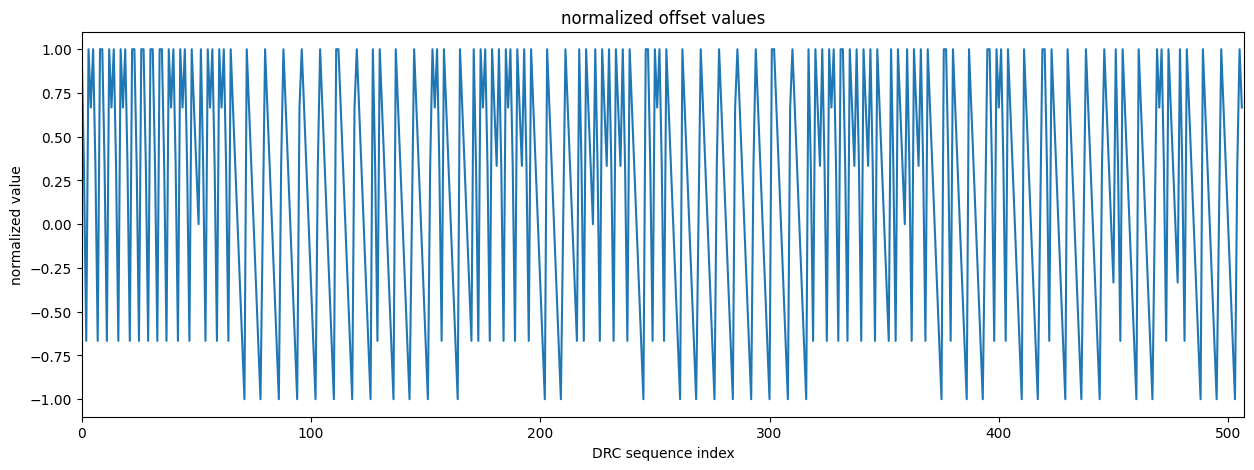

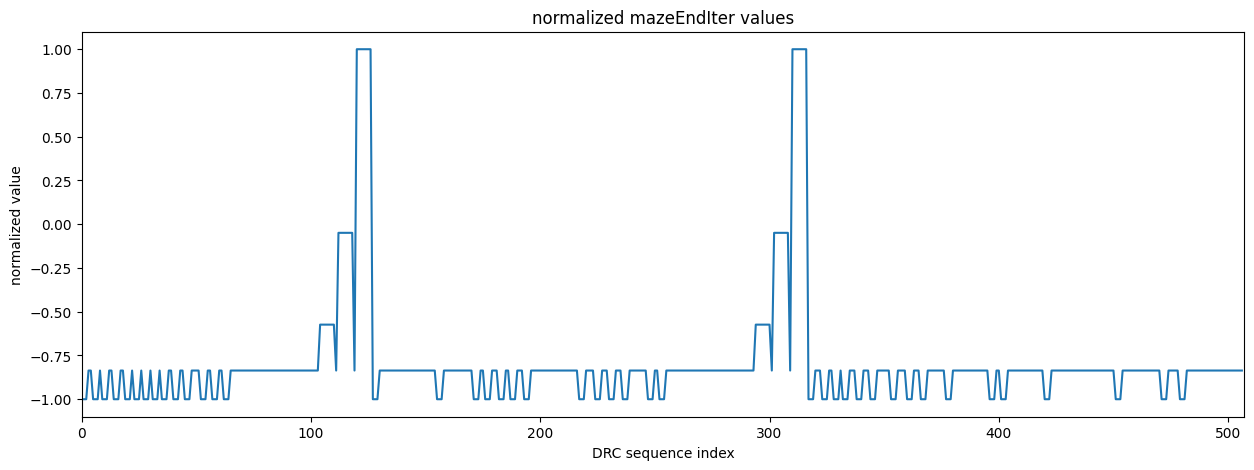

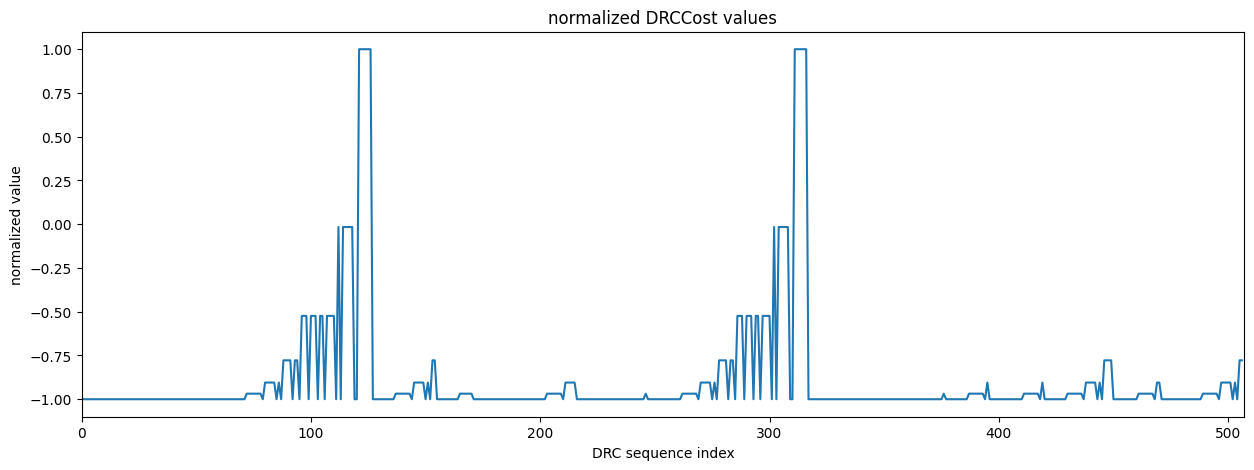

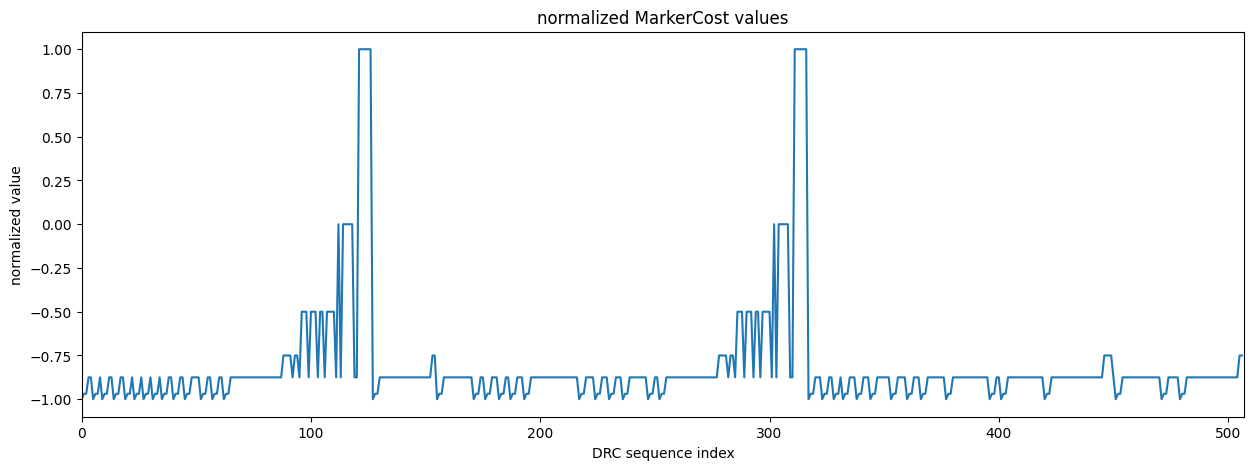

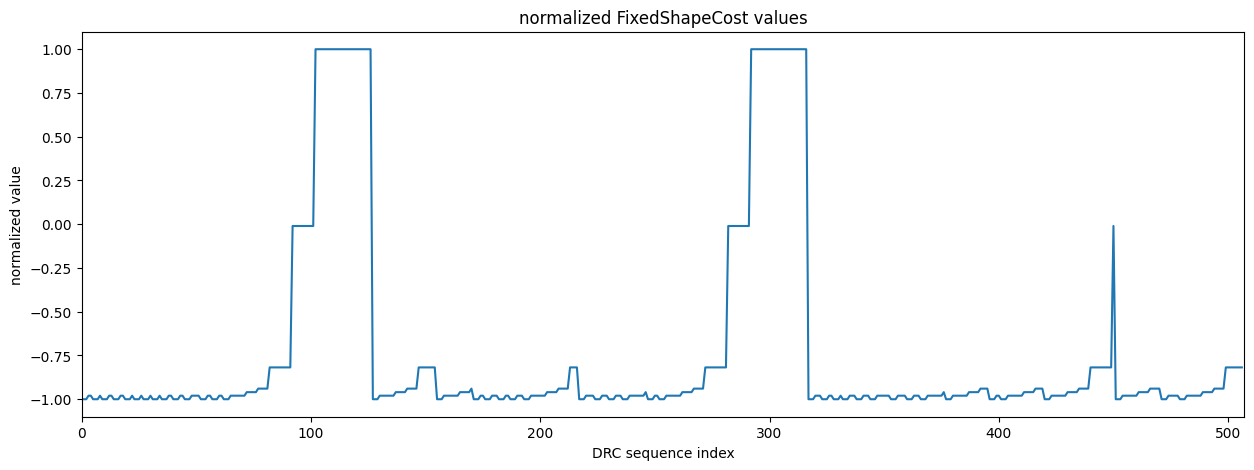

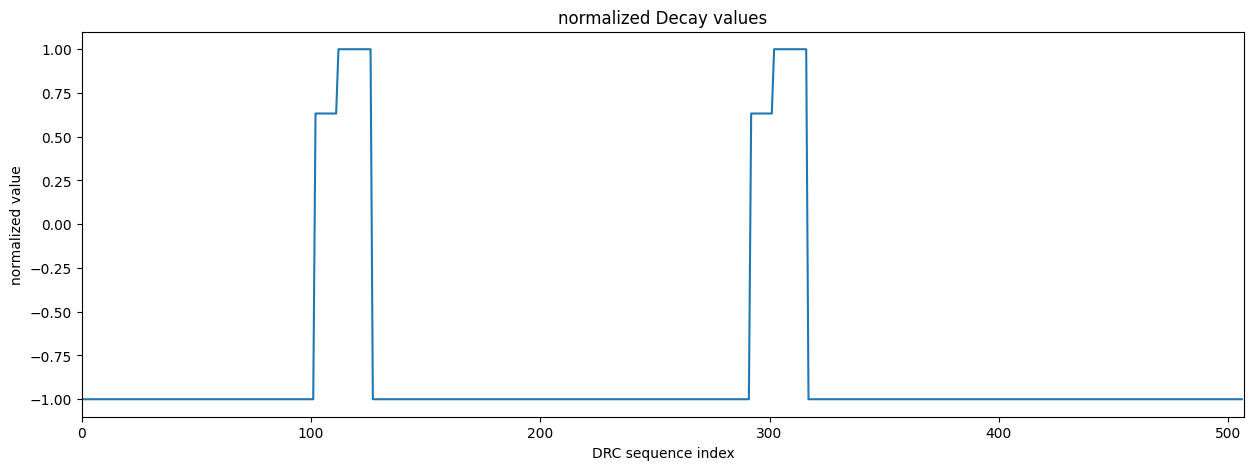

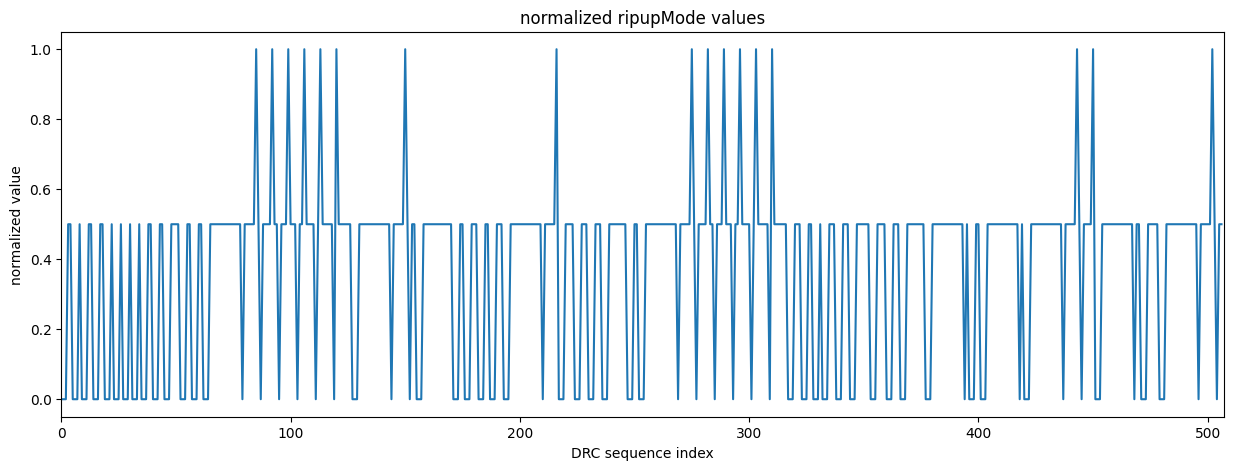

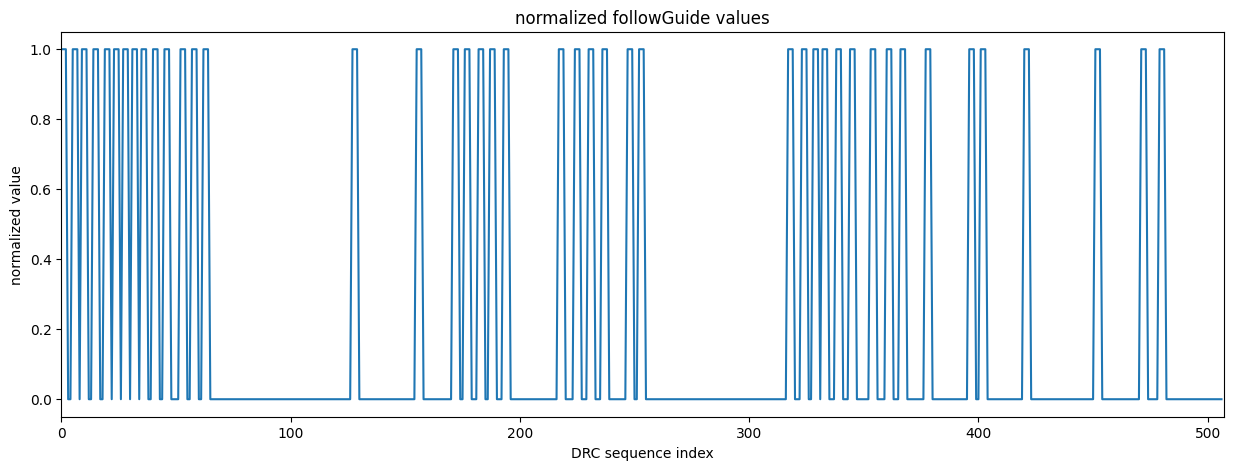

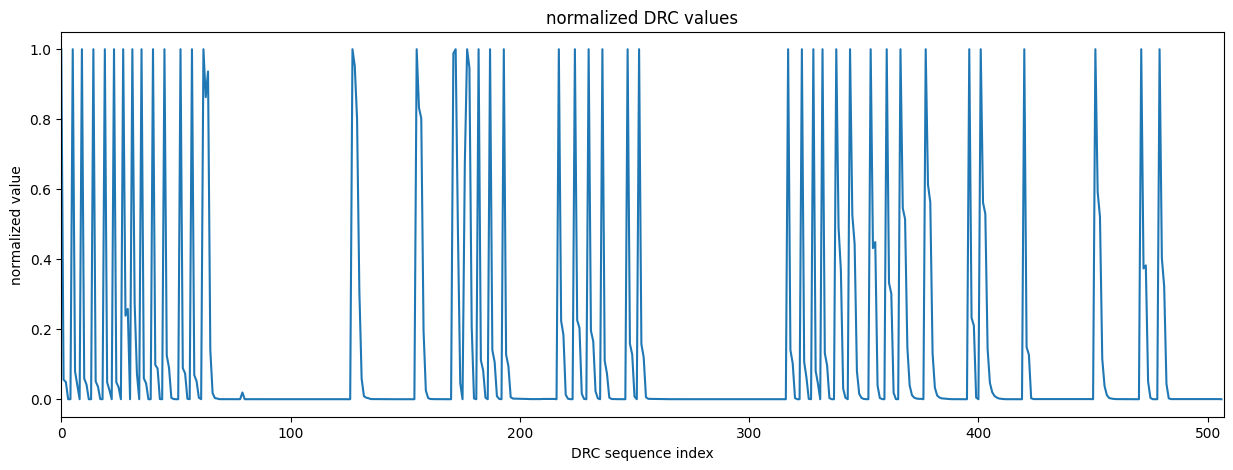

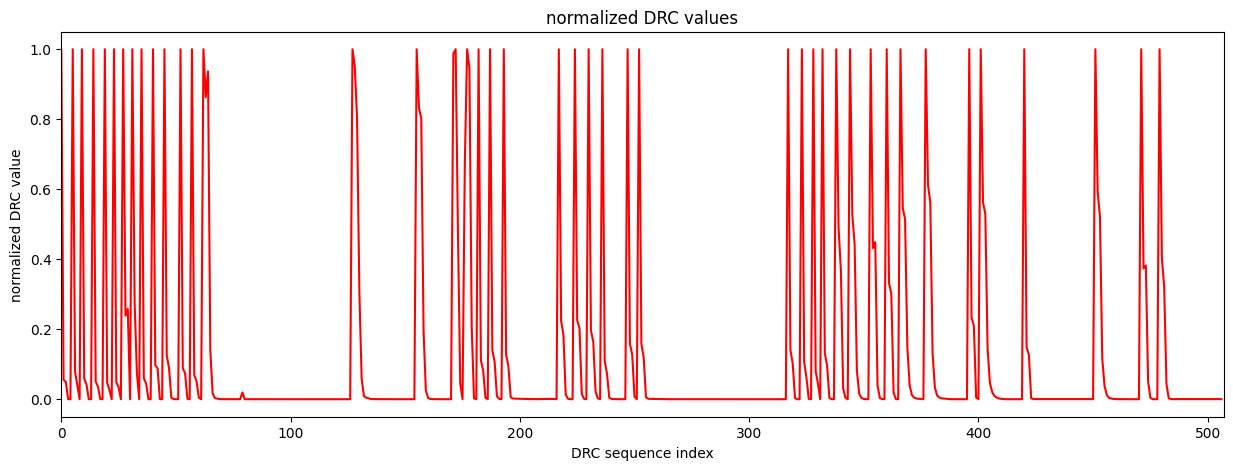

In [41]:
for column in df.columns:
    if column != 'length':
        plt.figure(figsize=(15, 5));
        plt.plot(np.arange(len(df)), df[column])
        plt.title(f'normalized {column} values')
        plt.xlabel('DRC sequence index')
        plt.ylabel('normalized value')
        plt.xlim([0, len(df)])
        plt.show()
plt.figure(figsize=(15, 5));
plt.plot(np.arange(len(df)), df['DRC'], 'r')
plt.title(f'normalized DRC values')
plt.xlabel('DRC sequence index')
plt.ylabel('normalized DRC value')
plt.xlim([0, len(df)])
plt.show()

**split train and test sets**

In [42]:
from sklearn.model_selection import train_test_split

test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(
    df.loc[:, :'DRC'], df.loc[:, 'DRC':], test_size=test_size, random_state=42, shuffle=False)

In [43]:
X_train.shape

(405, 9)

In [44]:
X_test.shape

(102, 9)

In [45]:
y_train.shape

(405, 2)

In [46]:
y_test.shape

(102, 2)

In [47]:
X_train.head(10)

offset  mazeEndIter  DRCCost  MarkerCost  FixedShapeCost  Decay  \
0    1.000000    -1.000000     -1.0    -1.00000       -1.000000   -1.0   
1    0.333333    -1.000000     -1.0    -0.96875       -1.000000   -1.0   
2   -0.666667    -1.000000     -1.0    -0.96875       -1.000000   -1.0   
3    1.000000    -0.836066     -1.0    -0.87500       -0.979798   -1.0   
4    0.666667    -0.836066     -1.0    -0.87500       -0.979798   -1.0   
65   1.000000    -1.000000     -1.0    -1.00000       -1.000000   -1.0   
66   0.333333    -1.000000     -1.0    -0.96875       -1.000000   -1.0   
67  -0.666667    -1.000000     -1.0    -0.96875       -1.000000   -1.0   
68   1.000000    -0.836066     -1.0    -0.87500       -0.979798   -1.0   
130  1.000000    -1.000000     -1.0    -1.00000       -1.000000   -1.0   

     ripupMode  followGuide       DRC  
0          0.0            1  1.000000  
1          0.0            1  0.055905  
2          0.0            1  0.049027  
3          0.5            0  0.000098  
4          0.5            0  0.000000  
65         0.0            1  1.000000  
66         0.0            1  0.079646  
67         0.0            1  0.039823  
68         0.5            0  0.000000  
130        0.0            1  1.000000

In [48]:
y_train

DRC    length
0     1.000000  0.061538
1     0.055905  0.061538
2     0.049027  0.061538
3     0.000098  0.061538
4     0.000000  0.061538
...        ...       ...
2409  0.000000  0.061538
2470  1.000000  0.276923
2471  0.561841  0.276923
2472  0.529939  0.276923
2473  0.143783  0.276923

[405 rows x 2 columns]

**normalize data**

In [49]:
# from sklearn.preprocessing import MinMaxScaler

# # function for min-max normalization of stock
# def normalize_data(data):
#     # instantiate scalers
#     sc = MinMaxScaler(feature_range=(-1, 1))
#     data_scaled = sc.fit_transform(data)

#     return data_scaled, sc

In [50]:
# X_train_norm, _ = normalize_data(X_train)
# y_train_norm, _ = normalize_data(y_train)

In [51]:
# X_train_norm.shape

**window sliding**

In [52]:
X_train.shape[1]

9

In [53]:
# convert train_norm to a tensor
X_train = X_train.to_numpy()
X_train = torch.FloatTensor(X_train).view((-1, X_train.shape[1]))
y_train = y_train.to_numpy()
y_train = torch.FloatTensor(y_train).view((-1, y_train.shape[1]))

In [54]:
X_train.shape

torch.Size([405, 9])

In [55]:
y_train.shape

torch.Size([405, 2])

In [56]:
y_train[0]

tensor([1.0000, 0.0615])

In [57]:
# define a function to create sequence/label tuples
def input_data(dataX,datay,ws):
    out = []
    L = len(dataX)
    for i in range(L-ws):
        window = dataX[i:i+ws]
        coeff = dataX[i+ws][:-1]
        # C++ deployment API requires only 1 tensor input
        tmp = torch.cat((coeff, torch.zeros(1))).reshape(1, -1)
        input = torch.cat((window, tmp))
        label = datay[i+ws:i+ws+1]
        out.append((input, label))
    return out

In [58]:
# define a window size
window_size = 2
# apply X_train_norm and y_train_norm to get window sliding results
train = input_data(X_train, y_train, window_size)

In [59]:
len(train)

403

In [60]:
X_train[0:5]

tensor([[ 1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00, -1.0000e+00,
         -1.0000e+00,  0.0000e+00,  1.0000e+00,  1.0000e+00],
        [ 3.3333e-01, -1.0000e+00, -1.0000e+00, -9.6875e-01, -1.0000e+00,
         -1.0000e+00,  0.0000e+00,  1.0000e+00,  5.5905e-02],
        [-6.6667e-01, -1.0000e+00, -1.0000e+00, -9.6875e-01, -1.0000e+00,
         -1.0000e+00,  0.0000e+00,  1.0000e+00,  4.9027e-02],
        [ 1.0000e+00, -8.3607e-01, -1.0000e+00, -8.7500e-01, -9.7980e-01,
         -1.0000e+00,  5.0000e-01,  0.0000e+00,  9.8251e-05],
        [ 6.6667e-01, -8.3607e-01, -1.0000e+00, -8.7500e-01, -9.7980e-01,
         -1.0000e+00,  5.0000e-01,  0.0000e+00,  0.0000e+00]])

In [61]:
train[0]

(tensor([[ 1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,  0.0000,  1.0000,
           1.0000],
         [ 0.3333, -1.0000, -1.0000, -0.9688, -1.0000, -1.0000,  0.0000,  1.0000,
           0.0559],
         [-0.6667, -1.0000, -1.0000, -0.9688, -1.0000, -1.0000,  0.0000,  1.0000,
           0.0000]]),
 tensor([[0.0490, 0.0615]]))

In [62]:
train[1]

(tensor([[ 0.3333, -1.0000, -1.0000, -0.9688, -1.0000, -1.0000,  0.0000,  1.0000,
           0.0559],
         [-0.6667, -1.0000, -1.0000, -0.9688, -1.0000, -1.0000,  0.0000,  1.0000,
           0.0490],
         [ 1.0000, -0.8361, -1.0000, -0.8750, -0.9798, -1.0000,  0.5000,  0.0000,
           0.0000]]),
 tensor([[9.8251e-05, 6.1538e-02]]))

In [63]:
print(f"total intput shape: {train[0][0].shape}")
print(f"time series intput shape: {train[0][0][:-1, :].shape}")
print(f"current timestamp coefficient shape: {train[0][0][-1, :-1].shape}")
print(f"label shape: {train[0][1].shape}")

total intput shape: torch.Size([3, 9])
time series intput shape: torch.Size([2, 9])
current timestamp coefficient shape: torch.Size([8])
label shape: torch.Size([1, 2])


# 4. Model and validate data <a class="anchor" id="4-bullet"></a> 

In [64]:
# import keras
# from keras.models import Sequential
# from keras.layers import Dense, LSTM, Dropout

In [65]:
# print(keras.__version__)

In [66]:
# # reference: https://medium.com/mlearning-ai/multivariate-time-series-forecasting-using-rnn-lstm-8d840f3f9aa7
# model = Sequential()
# model.add(LSTM(units=50, return_sequences=True, input_shape=(20, 4)))
# model.add(Dropout(0.2))
# model.add(LSTM(units=50))
# model.add(Dropout(0.2))
# model.add(Dense(1))

In [67]:
# epoch = 100
# batch = 32
# lr = 1e-3
# model.compile(optimizer=keras.optimizers.Adam(learning_rate=lr),
#               loss=keras.losses.MeanSquaredError())
# model.fit(X_train_shape, y_train, epochs=epoch, batch_size=batch)

In [68]:
train[0][0].shape

torch.Size([3, 9])

In [69]:
train[0][1].shape

torch.Size([1, 2])

In [70]:
class LSTMnetwork(nn.Module):
    def __init__(self,input_size=9, seq_len=2, coeff_size=8, hidden_size=10,
                 output_size=2,num_layers=2,dropout=0.2):
        super().__init__()
        self.hidden_size = hidden_size
        self.seq_len = seq_len
        self.coeff_size = coeff_size
        
        # initializing h0 and c0:
        self.hidden = (torch.zeros(num_layers,self.hidden_size),
                       torch.zeros(num_layers,self.hidden_size))

        # add an LSTM layer:
        self.lstm = nn.LSTM(input_size,hidden_size, 
                            num_layers=num_layers, dropout=dropout)
        
        # add a fully-connected layer:
        self.linear = nn.Linear(hidden_size * self.seq_len + self.coeff_size, output_size)

    def forward(self, inputs):
        seq = inputs[:-1, :].view(inputs.shape[0] - 1, -1)
        coeff = inputs[-1, :-1].view(self.coeff_size)
        
        lstm_out, self.hidden = self.lstm(seq, self.hidden)
        
        data = torch.cat((lstm_out.view(self.seq_len * self.hidden_size), coeff), 0)

        pred = self.linear(data)
        
        return pred

**instantiation, loss, and optimizer**

In [71]:
train[0][0].shape

torch.Size([3, 9])

In [72]:
train[0][1].shape[0]

1

In [73]:
train[0]

(tensor([[ 1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,  0.0000,  1.0000,
           1.0000],
         [ 0.3333, -1.0000, -1.0000, -0.9688, -1.0000, -1.0000,  0.0000,  1.0000,
           0.0559],
         [-0.6667, -1.0000, -1.0000, -0.9688, -1.0000, -1.0000,  0.0000,  1.0000,
           0.0000]]),
 tensor([[0.0490, 0.0615]]))

In [74]:
torch.manual_seed(42)

# instantiate
seq_len = train[0][0].shape[0] - 1
input_size = train[0][0].shape[1]
coeff_size = train[0][0][-1, :-1].shape[0]
hidden_size = 10
output_size = train[0][1].shape[1]
num_layers = 10
dropout = 0.2
batch_size = 1

model = LSTMnetwork(input_size=input_size, seq_len=seq_len, 
                    coeff_size=coeff_size, hidden_size=hidden_size,
                    output_size=output_size, num_layers=num_layers, 
                    dropout=dropout)

model

LSTMnetwork(
  (lstm): LSTM(9, 10, num_layers=10, dropout=0.2)
  (linear): Linear(in_features=28, out_features=2, bias=True)
)

In [75]:
# loss
criterion = nn.MSELoss()

#optimizer
learning_rate = 1e-3
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

**training**

In [76]:
epochs = 100

import time
start_time = time.time()

loss_list = []
for epoch in range(epochs):
    for inputs, y_train in train:
        optimizer.zero_grad()
        model.hidden = (torch.zeros(num_layers, model.hidden_size),
                        torch.zeros(num_layers, model.hidden_size))
        
        y_pred = model(inputs)
        
        loss = criterion(y_pred, y_train)
        loss.backward()
        optimizer.step()
        
    print(f'Epoch: {epoch+1:2} Loss: {loss.item():10.8f}')
    loss_list.append(loss.item())
print(f'\nDuration: {time.time() - start_time:.0f} seconds')

/home/jborg/Data/Research/DLPnR/DL-code-for-detailed-routing/env/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([1, 2])) that is different to the input size (torch.Size([2])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch:  1 Loss: 0.00356572
Epoch:  2 Loss: 0.00409492
Epoch:  3 Loss: 0.00363996
Epoch:  4 Loss: 0.00430026
Epoch:  5 Loss: 0.00406130
Epoch:  6 Loss: 0.00484976
Epoch:  7 Loss: 0.00308886
Epoch:  8 Loss: 0.00412901
Epoch:  9 Loss: 0.00454375
Epoch: 10 Loss: 0.00365370
Epoch: 11 Loss: 0.00353113
Epoch: 12 Loss: 0.00392085
Epoch: 13 Loss: 0.00394278
Epoch: 14 Loss: 0.00342660
Epoch: 15 Loss: 0.00342462
Epoch: 16 Loss: 0.00378374
Epoch: 17 Loss: 0.00349505
Epoch: 18 Loss: 0.00340253
Epoch: 19 Loss: 0.00332152
Epoch: 20 Loss: 0.00348540
Epoch: 21 Loss: 0.00338134
Epoch: 22 Loss: 0.00321032
Epoch: 23 Loss: 0.00319984
Epoch: 24 Loss: 0.00312386
Epoch: 25 Loss: 0.00318171
Epoch: 26 Loss: 0.00305852
Epoch: 27 Loss: 0.00302922
Epoch: 28 Loss: 0.00296912
Epoch: 29 Loss: 0.00300033
Epoch: 30 Loss: 0.00293386
Epoch: 31 Loss: 0.00289895
Epoch: 32 Loss: 0.00283191
Epoch: 33 Loss: 0.00277969
Epoch: 34 Loss: 0.00276307
Epoch: 35 Loss: 0.00275275
Epoch: 36 Loss: 0.00277714
Epoch: 37 Loss: 0.00267538
E

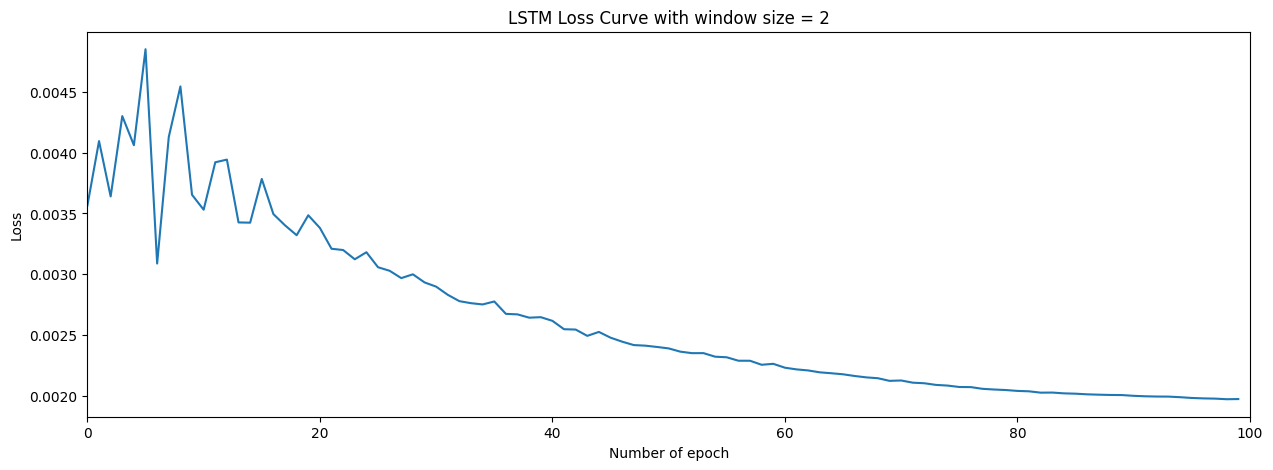

In [77]:
# visualization loss 
plt.figure(figsize=(15, 5));
plt.plot(list(range(len(loss_list))),loss_list)
plt.xlabel("Number of epoch")
plt.xlim([0, epochs])
plt.ylabel("Loss")
plt.title(f"LSTM Loss Curve with window size = {window_size}")
plt.show()

# 5. Predictions <a class="anchor" id="5-bullet"></a> 

**test set normalization**

In [78]:
# X_test_norm, scaler_X_test = normalize_data(X_test)
# y_test_norm, scaler_y_test = normalize_data(y_test)

**test set window sliding**

In [79]:
# convert train_norm to a tensor
X_test = X_test.to_numpy()
X_test = torch.FloatTensor(X_test).view((-1, X_test.shape[1]))
y_test = y_test.to_numpy()
y_test = torch.FloatTensor(y_test).view((-1, y_test.shape[1]))

In [80]:
# apply X_train_norm and y_train_norm to get window sliding results
test = input_data(X_test, y_test, window_size)

In [81]:
test[0]

(tensor([[ 0.6667, -0.8361, -1.0000, -0.8750, -0.9798, -1.0000,  0.5000,  0.0000,
           0.0466],
         [ 0.3333, -0.8361, -1.0000, -0.8750, -0.9798, -1.0000,  0.5000,  0.0000,
           0.0203],
         [ 0.0000, -0.8361, -1.0000, -0.8750, -0.9798, -1.0000,  0.5000,  0.0000,
           0.0000]]),
 tensor([[0.0093, 0.2769]]))

In [82]:
len(test)

100

**test set prediction**

In [83]:
# this prediction uses ground truth data to predict 1 future data point
# but cannot predict more future data points based on predicted data
testset_size = len(test)

preds = []

model.eval()

for i in range(testset_size):
    inputs = test[i][0]
    with torch.no_grad():
        model.hidden = (torch.zeros(num_layers,model.hidden_size),
                        torch.zeros(num_layers,model.hidden_size))
        preds.append(model(inputs).tolist())

preds = np.array(preds).reshape(len(preds), output_size)

In [84]:
len(preds)

100

In [85]:
len(y_test[window_size:])

100

In [86]:
preds

array([[ 0.00603844,  0.28829992],
       [-0.03939485,  0.31288022],
       [-0.08482814,  0.33746058],
       [-0.13026142,  0.36204091],
       [ 0.14851487,  0.22816136],
       [ 0.10308158,  0.25274172],
       [ 0.05764829,  0.27732205],
       [ 0.012215  ,  0.30190241],
       [-0.03321829,  0.32648274],
       [-0.0784289 ,  0.36112958],
       [-0.12386218,  0.38570994],
       [-0.02678019,  0.32213256],
       [ 0.16064528,  0.24529999],
       [ 0.6733675 ,  0.00921112],
       [ 0.57800233,  0.05868882],
       [ 0.44170246,  0.1324299 ],
       [ 0.14233831,  0.21455884],
       [ 0.09690502,  0.2391392 ],
       [ 0.05147173,  0.26371956],
       [ 0.00603844,  0.28829992],
       [-0.03939485,  0.31288022],
       [-0.08482814,  0.33746058],
       [-0.13026142,  0.36204091],
       [ 0.14851487,  0.22816136],
       [ 0.10308158,  0.25274172],
       [ 0.05764829,  0.27732205],
       [ 0.012215  ,  0.30190241],
       [-0.03321829,  0.32648274],
       [-0.0784289 ,

**inverting the normalized values**

In [87]:
# true_predictions = scaler_y_test.inverse_transform(np.array(preds).reshape(-1, 1))
# true_predictions

# scale back number of iterations
tmp = preds[:, 1] * designSize
tmp = tmp.astype('int')
preds[:, 1] = tmp

for i in range(y_test.shape[0]):
    y_test[i, -1] = int(y_test[i, -1] * designSize)

In [88]:
y_test.shape

torch.Size([102, 2])

**plotting**

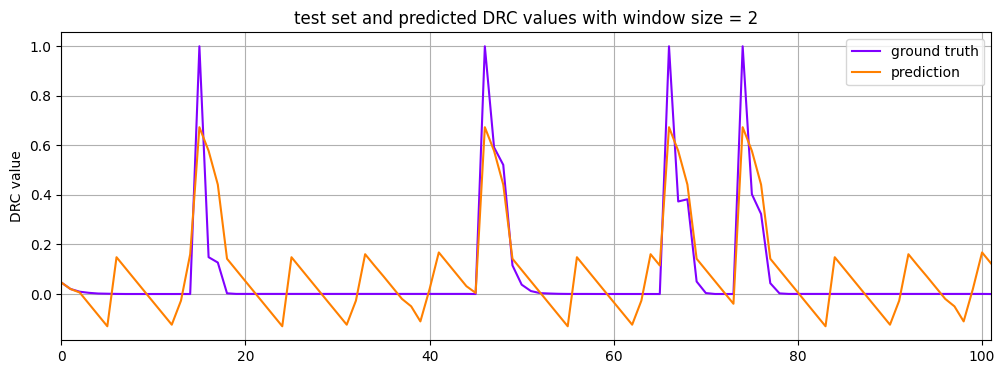

In [89]:
fig = plt.figure(figsize=(12,4))
x = np.arange(y_test.shape[0])
plt.title(f'test set and predicted DRC values with window size = {window_size}')
plt.ylabel('DRC value')
plt.grid(True)
plt.autoscale(axis='x',tight=True)
# fig.autofmt_xdate()

# predict = np.vstack((np.zeros(window_size).reshape(-1, 1), true_predictions))
predictDRC = np.vstack((np.array(y_test[:window_size, 0]).reshape(-1, 1), preds[:, 0].reshape(-1, 1)))
plt.plot(x, np.array(y_test[:, 0]), color='#8000ff', label='ground truth')
plt.plot(x, predictDRC, color='#ff8000', label='prediction')
plt.legend()
plt.show()

In [90]:
predictDRC

array([[ 0.04663339],
       [ 0.02025513],
       [ 0.00603844],
       [-0.03939485],
       [-0.08482814],
       [-0.13026142],
       [ 0.14851487],
       [ 0.10308158],
       [ 0.05764829],
       [ 0.012215  ],
       [-0.03321829],
       [-0.0784289 ],
       [-0.12386218],
       [-0.02678019],
       [ 0.16064528],
       [ 0.6733675 ],
       [ 0.57800233],
       [ 0.44170246],
       [ 0.14233831],
       [ 0.09690502],
       [ 0.05147173],
       [ 0.00603844],
       [-0.03939485],
       [-0.08482814],
       [-0.13026142],
       [ 0.14851487],
       [ 0.10308158],
       [ 0.05764829],
       [ 0.012215  ],
       [-0.03321829],
       [-0.0784289 ],
       [-0.12386218],
       [-0.02678019],
       [ 0.16064528],
       [ 0.11521199],
       [ 0.07111479],
       [ 0.0256815 ],
       [-0.01975179],
       [-0.04978271],
       [-0.11061838],
       [ 0.01998918],
       [ 0.16780266],
       [ 0.12236938],
       [ 0.0769361 ],
       [ 0.03150281],
       [ 0

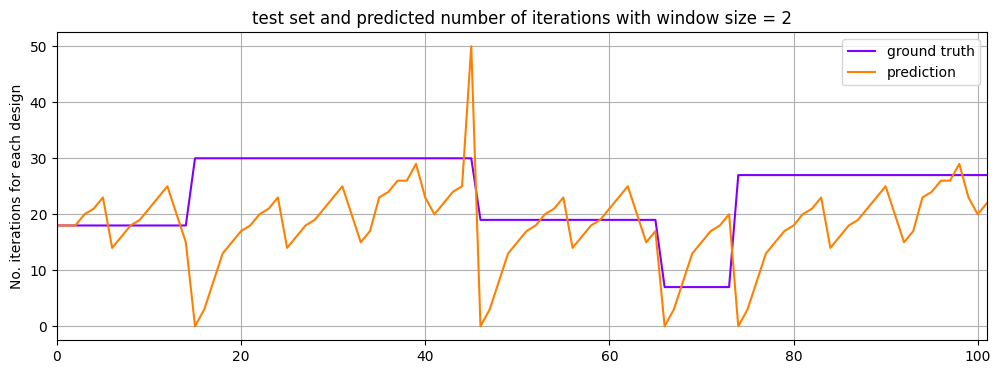

In [91]:
fig = plt.figure(figsize=(12,4))
x = np.arange(y_test.shape[0])
plt.title(f'test set and predicted number of iterations with window size = {window_size}')
plt.ylabel('No. iterations for each design')
plt.grid(True)
plt.autoscale(axis='x',tight=True)
# fig.autofmt_xdate()

# predict = np.vstack((np.zeros(window_size).reshape(-1, 1), true_predictions))
predictLen = np.vstack((np.array(y_test[:window_size, -1]).reshape(-1, 1), preds[:, 1].reshape(-1, 1)))
plt.plot(x, np.array(y_test[:, -1]), color='#8000ff', label='ground truth')
plt.plot(x, predictLen, color='#ff8000', label='prediction')
# plt.ylim([0, designSize])
plt.legend()
plt.show()

In [92]:
# fig = plt.figure(figsize=(12,4))
# x = np.arange(y_test.shape[0])
# plt.title(f'test set and predicted number of iterations with window size = {window_size}')
# plt.ylabel('No. iterations for each design')
# plt.grid(True)
# plt.autoscale(axis='x',tight=True)
# # fig.autofmt_xdate()

# # predict = np.vstack((np.zeros(window_size).reshape(-1, 1), true_predictions))
# predictLen = np.vstack((np.array(y_test[:window_size, -1]).reshape(-1, 1), preds[:, 1].reshape(-1, 1)))
# plt.plot(x, np.array(y_test[:, -1]), color='#8000ff', label='ground truth')
# plt.plot(x, predictLen, color='#ff8000', label='prediction')
# plt.ylim([0, designSize])
# plt.legend()
# plt.show()

In [93]:
predictLen

array([[18.],
       [18.],
       [18.],
       [20.],
       [21.],
       [23.],
       [14.],
       [16.],
       [18.],
       [19.],
       [21.],
       [23.],
       [25.],
       [20.],
       [15.],
       [ 0.],
       [ 3.],
       [ 8.],
       [13.],
       [15.],
       [17.],
       [18.],
       [20.],
       [21.],
       [23.],
       [14.],
       [16.],
       [18.],
       [19.],
       [21.],
       [23.],
       [25.],
       [20.],
       [15.],
       [17.],
       [23.],
       [24.],
       [26.],
       [26.],
       [29.],
       [23.],
       [20.],
       [22.],
       [24.],
       [25.],
       [50.],
       [ 0.],
       [ 3.],
       [ 8.],
       [13.],
       [15.],
       [17.],
       [18.],
       [20.],
       [21.],
       [23.],
       [14.],
       [16.],
       [18.],
       [19.],
       [21.],
       [23.],
       [25.],
       [20.],
       [15.],
       [17.],
       [ 0.],
       [ 3.],
       [ 8.],
       [13.],
       [15.],
      

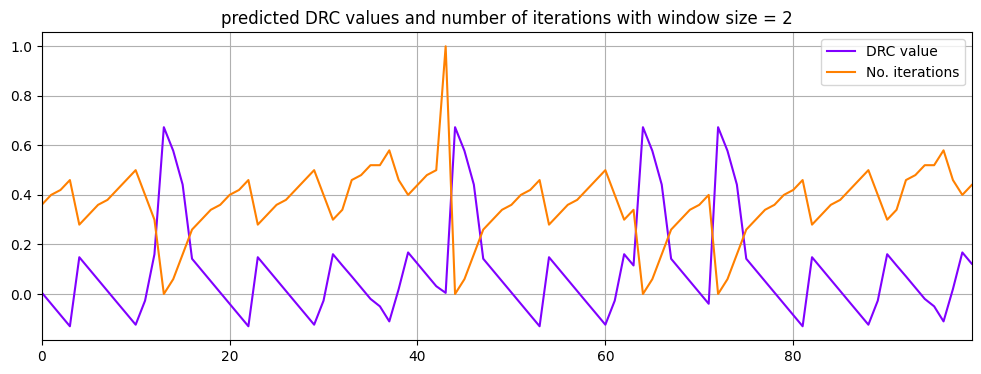

In [94]:
fig = plt.figure(figsize=(12,4))
x = np.arange(preds.shape[0])
plt.title(f'predicted DRC values and number of iterations with window size = {window_size}')
plt.grid(True)
plt.autoscale(axis='x',tight=True)
# fig.autofmt_xdate()

# predict = np.vstack((np.zeros(window_size).reshape(-1, 1), true_predictions))
prediction = np.vstack((np.array(y_test[:window_size, -1]).reshape(-1, 1), preds[:, 1].reshape(-1, 1)))
plt.plot(x, np.array(preds[:, 0]), color='#8000ff', label='DRC value')
plt.plot(x, np.array(preds[:, 1]) / np.max(preds[:, 1]), color='#ff8000', label='No. iterations')
# plt.ylim([0, designSize])
plt.legend()
plt.show()

In [96]:
# save residual data for model performance comparison
data = np.array(y_test[:, 0]).reshape(predictDRC.shape) - predictDRC
data = data.reshape(len(data))
dataf = pd.DataFrame(data)
dataf.to_csv("../data/dataset/DRC value prediction residual for window size = " + str(window_size) + ".csv", columns=None)

In [97]:
# save residual data for model performance comparison
data = np.array(y_test[:, -1]).reshape(predictLen.shape) - predictLen
data = data.reshape(len(data))
dataf = pd.DataFrame(data)
dataf.to_csv("../data/dataset/Number of iterations prediction residual for window size = " + str(window_size) + ".csv", columns=None)

### residual DRC value

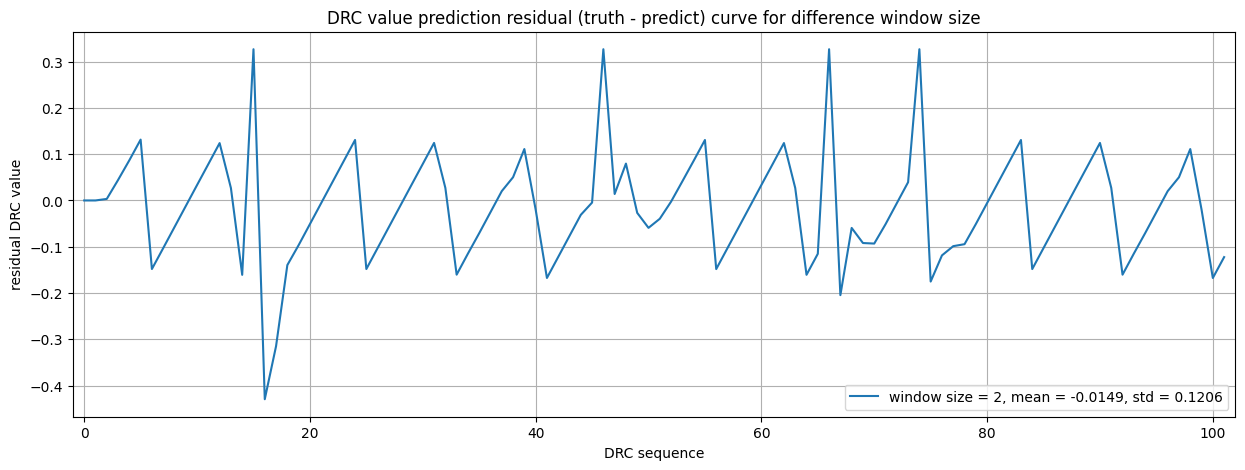

In [112]:
# sizeData = [1, 2, 3, 4, 5, 10, 20]
sizeData = [window_size]
plt.figure(figsize=(15, 5));
for s in sizeData:
    dataf = pd.read_csv("../data/dataset/DRC value prediction residual for window size = " + str(s) + ".csv")
    plt.plot(dataf.iloc[:, 1].values, label="window size = " + str(s) + ", mean = " + str(round(np.mean(dataf.iloc[:, 1].values), 4))
             + ", std = " + str(round(np.std(dataf.iloc[:, 1].values), 4)))
plt.title('DRC value prediction residual (truth - predict) curve for difference window size')
plt.xlabel('DRC sequence')
plt.ylabel('residual DRC value')
plt.xlim([-1, len(dataf)])
# plt.ylim([-0.1, 0.1])
plt.grid()
plt.legend()
plt.show()

In [113]:
# sizeData = [1, 2, 3, 4, 5, 10, 20]
# plt.figure(figsize=(15, 5));
# for s in sizeData:
#     dataf = pd.read_csv("./prediction residual for window size = " + str(s) + ".csv")
#     plt.plot(dataf.iloc[:, 1].values, label="window size = " + str(s) + ", mean = " + str(round(np.mean(dataf.iloc[:, 1].values), 4))
#              + ", std = " + str(round(np.std(dataf.iloc[:, 1].values), 4)))
# plt.title('DRC value prediction residual (truth - predict) curve for difference window size')
# plt.xlabel('DRC sequence')
# plt.ylabel('residual DRC value')
# plt.xlim([-1, len(dataf)])
# plt.ylim([-0.1, 0.1])
# plt.grid()
# plt.legend()
# plt.show()

In [114]:
# sizeData = [1]
# plt.figure(figsize=(15, 5));
# for s in sizeData:
#     dataf = pd.read_csv("./prediction residual for window size = " + str(s) + ".csv")
#     plt.plot(dataf.iloc[:, 1].values, label="window size = " + str(s) + ", mean = " + str(round(np.mean(dataf.iloc[:, 1].values), 4))
#              + ", std = " + str(round(np.std(dataf.iloc[:, 1].values), 4)))
# plt.title('DRC value prediction residual (truth - predict) curve for difference window size')
# plt.xlabel('DRC sequence')
# plt.ylabel('residual DRC value')
# plt.xlim([-1, len(dataf)])
# plt.ylim([-0.1, 0.1])
# plt.grid()
# plt.legend()
# plt.show()

### residual value for number of iterations

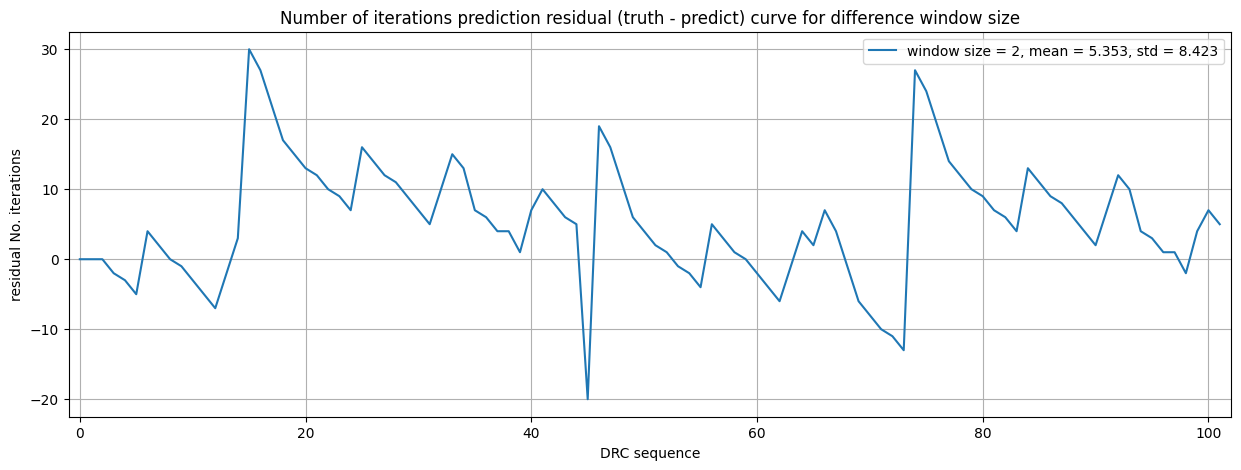

In [115]:
# sizeData = [1, 2, 3, 4, 5, 10, 20]
sizeData = [window_size]
plt.figure(figsize=(15, 5));
for s in sizeData:
    dataf = pd.read_csv("../data/dataset/Number of iterations prediction residual for window size = " + str(s) + ".csv")
    plt.plot(dataf.iloc[:, 1].values, label="window size = " + str(s) + ", mean = " + str(round(np.mean(dataf.iloc[:, 1].values), 3))
            + ", std = " + str(round(np.std(dataf.iloc[:, 1].values), 3)))
plt.title('Number of iterations prediction residual (truth - predict) curve for difference window size')
plt.xlabel('DRC sequence')
plt.ylabel('residual No. iterations')
plt.xlim([-1, len(dataf)])
# plt.ylim([-0.1, 0.1])
plt.grid()
plt.legend()
plt.show()

In [116]:
# sizeData = [4]
# # sizeData = [3]
# plt.figure(figsize=(15, 5));
# for s in sizeData:
#     dataf = pd.read_csv("./Number of iterations prediction residual for window size = " + str(s) + ".csv")
#     plt.plot(dataf.iloc[:, 1].values, label="window size = " + str(s) + ", mean = " + str(round(np.mean(dataf.iloc[:, 1].values), 3))
#             + ", std = " + str(round(np.std(dataf.iloc[:, 1].values), 3)))
# plt.title('Number of iterations prediction residual (truth - predict) curve for difference window size')
# plt.xlabel('DRC sequence')
# plt.ylabel('residual No. iterations')
# plt.xlim([-1, len(dataf)])
# # plt.ylim([-0.1, 0.1])
# plt.grid()
# plt.legend()
# plt.show()

# 6. Deployment <a class="anchor" id="6-bullet"></a> 

### converting to torch script via tracing

In [117]:
# converting to Torch Script via annotation
scriptModule = torch.jit.script(model)

In [118]:
# serialize model to a file
modelName = "./model/LSTM_hidden10_layer10_window2.pt"
scriptModule.save("./model/LSTM_hidden10_layer10_window2.pt")

In [119]:
# inputs shape
train[0][0].shape

torch.Size([3, 9])

In [120]:
# outputs shape
train[0][1].shape

torch.Size([1, 2])

### Verify C++ model output

In [121]:
# load model
model = torch.jit.load("./model/LSTM_hidden10_layer10_window2.pt")
model.eval()

RecursiveScriptModule(
  original_name=LSTMnetwork
  (lstm): RecursiveScriptModule(original_name=LSTM)
  (linear): RecursiveScriptModule(original_name=Linear)
)

In [122]:
testInput = torch.ones(3, 9)
testInput

tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [123]:
testOutput = model.forward(testInput)
testOutput

tensor([0.7002, 0.8831], grad_fn=<ViewBackward0>)